# Analyse 

# Sommaire :
- <a href="#C1">Importation des données</a>

**Partie 1 : Distribution et analyse univariée**
 - <a href="#C2">client_id</a>
 - <a href="#C2.1">id_prod</a>
 - <a href="#C3">session_id</a>
 - <a href="#C4">sex</a>
 - <a href="#C5">birth</a>
 - <a href="#C6">price</a>
 - <a href="#C7">categ</a>
 - <a href="#C8">date</a>
 
**Partie 2 : Analyse bivariée**
 - <a href="#C15">Test de la normalité de la variable price : histogramme et qq-plot</a>
 - <a href="#C15.1">test de la normalité de la variable age : histogramme et qq-plot</a>
 - <a href="#C16">age-price : Spearman, Kendall et ANOVA</a>
 - <a href="#C16.1">age-categ : ANOVA et Khi 2 </a>
 - <a href="#C16.2">age-sex : ANOVA et Khi 2</a>
 - <a href="#C17">price-categ : ANOVA</a>
 - <a href="#C18">price-sex : ANOVA</a>
 - <a href="#C21">categ-sex : Khi 2</a>

**Partie 3 : Evolution du CA**
 - <a href="#C9">Chiffre d'affaires reconstitué (prix 0_2245 manquant)</a>
 - <a href="#C91">Total du CA</a>
 - <a href="#C92">Tops et flops</a>
 - <a href="#C93">Taille du panier moyen</a>
 - <a href="#C10">Evolution du CA par mois</a>
 - <a href="#C11">Evolution du CA : moyenne mobile sur 10 jours</a>
 - <a href="#C12">Evolution du CA par jour</a>
 - <a href="#C13">CA manquant sur octobre de la 1ère année</a>
 - <a href="#C14">CA manquant fin février de la 2ème année</a>
 - <a href="#C14.5">Saisonnalité du CA</a>
 - <a href="#C14.6">CA : Répartition par catégorie</a>
 - <a href="#C14.7">Courbe de Lorenz</a>
 - <a href="#C14.8">Fréquence d'achat par mois</a>
 

# <a name="C1">Importation des données</a>

In [1]:
import pandas as pd
pd.options.display.max_columns = None # pour afficher toutes les colonnes
pd.options.display.max_rows = None # pour afficher toutes les lignes

import numpy as np

from scipy import stats

from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

import seaborn as sns

import statsmodels.api as sm
import pylab

pd.options.display.max_columns = None # pour afficher toutes les colonnes
pd.options.display.max_rows = None # pour afficher toutes les lignes

df = pd.read_csv('df.csv')
id_prod_0_2245_mean = pd.read_csv('id_prod_0_2245_mean.csv')
id_prod_0_2245_median = pd.read_csv('id_prod_0_2245_median.csv')

# <a name="C2"> client_id</a>

## Description des données

In [2]:
df['client_id'].describe(include='all')

count     679111
unique      8600
top       c_1609
freq       25488
Name: client_id, dtype: object

Il y a eu 8 600 clients uniques.
Le client c_1609 a acheté 25 488 produits.

- Calcul du nombres de lignes par client pour calculer le nombre de produits achetés par client 

- Top 30 des clients en nombre de produits achetés

- Description du décompte obtenu :
    - Boxplot
    - Statistiques descriptives

c_1609    25488
c_6714     9181
c_3454     6770
c_4958     5195
c_3263      403
c_2140      402
c_2595      398
c_2077      384
c_1637      380
c_7421      379
c_8026      376
c_760       375
c_1422      374
c_8510      373
c_5953      372
c_7319      371
c_8556      369
c_1570      369
c_7959      369
c_632       368
c_8392      368
c_4023      366
c_669       366
c_880       365
c_1636      363
c_2505      360
c_1876      356
c_963       356
c_778       355
c_3028      355
Name: client_id, dtype: int64


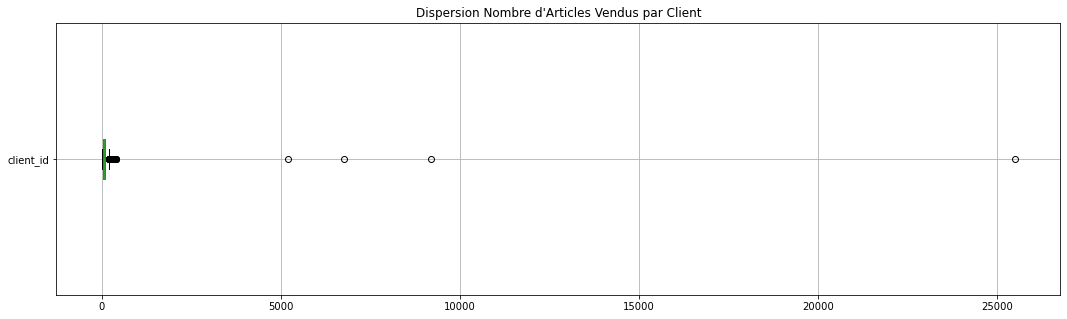

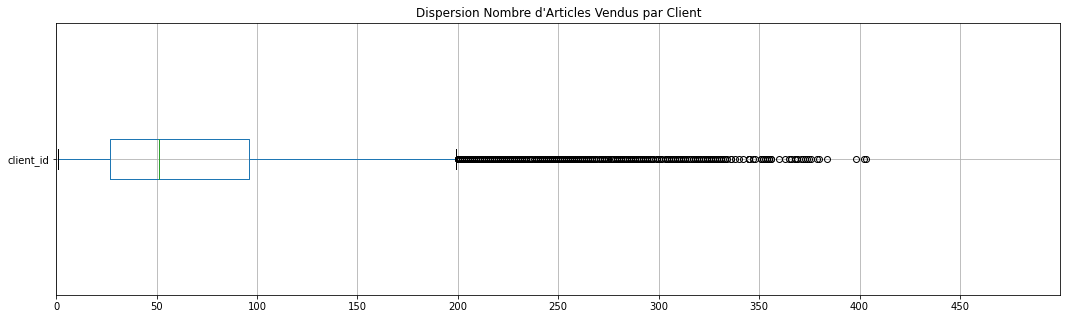

,client_id
count,8600.000000
mean,78.966395
std,312.402910
min,1.000000
25%,27.000000
50%,51.000000
75%,96.000000
max,25488.000000


In [3]:
client_id_count = df['client_id'].value_counts()

print(client_id_count[0:30]) # vérification et top 30 des clients en nombre de produits achetés

client_id_count = pd.DataFrame(client_id_count) # transformation en DataFrame

# boxplot du décompte
ax = client_id_count.boxplot(column='client_id', vert=False)
plt.title('Dispersion Nombre d\'Articles Vendus par Client')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

# boxplot du décompte : focus sur la box
ax = client_id_count.boxplot(column='client_id', vert=False)
plt.title('Dispersion Nombre d\'Articles Vendus par Client')
plt.xlim(0,500)
plt.xticks(np.arange(0, 500, step=50))
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

# Statistiques descriptives du décompte
client_id_count.describe()

- 4 clients sont des outliers sur le haut de la distribution :
    - c_1609 : 25 488 articles achetés.
    - c_6714 : 9 187 articles achetés.
    - 2 autres clients entre 5 000 et 10 000 (c_3454 et c_4958)
    - WARNING : est-il plausible que des clients individuels achètent autant ? Entreprises individuelles ? Entreprises obligées de renseigner une fiche client mentionnant le genre ?

## Analyse des outliers sur le haut de la distribution

### Stockage des achats effectués par les clients 'outliers'

In [4]:
# stockage des données concernant les 4 outliers
temp_df = df.loc[(df["client_id"] == 'c_1609') 
       | (df["client_id"] == 'c_6714') 
       | (df["client_id"] == 'c_3454')
       | (df["client_id"] == 'c_4958')]

temp_df.sort_values(by='date').head(10) # vérification

,id_prod,date,session_id,client_id,sex,birth,price,categ
219443,0_1304,2019-03-01 00:07:04.371179,s_7,c_1609,m,1980.0,5.86,0.0
3389,0_1159,2019-03-01 00:11:57.832228,s_7,c_1609,m,1980.0,7.99,0.0
90742,0_1431,2019-03-01 01:08:49.803921,s_33,c_3454,m,1969.0,10.99,0.0
439333,0_1425,2019-03-01 01:56:41.944044,s_46,c_1609,m,1980.0,12.99,0.0
264512,0_1469,2019-03-01 02:12:21.294004,s_53,c_1609,m,1980.0,14.99,0.0
120665,1_406,2019-03-01 02:41:13.649521,s_63,c_1609,m,1980.0,24.81,1.0
406237,1_730,2019-03-01 02:44:56.320114,s_53,c_1609,m,1980.0,22.65,1.0
259686,0_1529,2019-03-01 02:52:05.750117,s_46,c_1609,m,1980.0,3.99,0.0
31636,1_376,2019-03-01 03:55:08.643093,s_89,c_3454,m,1969.0,17.49,1.0
238512,1_350,2019-03-01 04:54:48.643575,s_113,c_4958,m,1999.0,20.83,1.0


Transformation en type datetime : 

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

temp_df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f',errors='coerce')

Transformation de l'index date en colonne :

In [6]:
temp_df.reset_index(inplace=True)
temp_df.head()

,index,id_prod,date,session_id,client_id,sex,birth,price,categ
0,3,0_1518,2019-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0
1,4,0_1518,2020-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0
2,5,0_1518,2021-02-09 11:52:55.100386,s_339104,c_6714,f,1968.0,4.18,0.0
3,6,0_1518,2019-10-23 21:58:50.700370,s_109153,c_6714,f,1968.0,4.18,0.0
4,7,0_1518,2020-10-30 01:17:07.487046,s_289949,c_6714,f,1968.0,4.18,0.0


vérification

In [7]:
temp_df['date'].dtypes

dtype('<M8[ns]')

vérification validée

### Recherche de doublons dans les dates :

In [8]:
# nombre de lignes du dataframe
print('nombre de lignes de la colonne date : ', len(temp_df['date']))

# valeurs uniques dans la colonne date
print('nombre de valeurs uniques dans la colonne date : ',len(temp_df['date'].unique()))

nombre de lignes de la colonne date :  46634
nombre de valeurs uniques dans la colonne date :  46634


Il n'y a pas de doublons dans la colonne date.

### Régularité des achats sur la période

Répartition du nombre de ventes par mois :

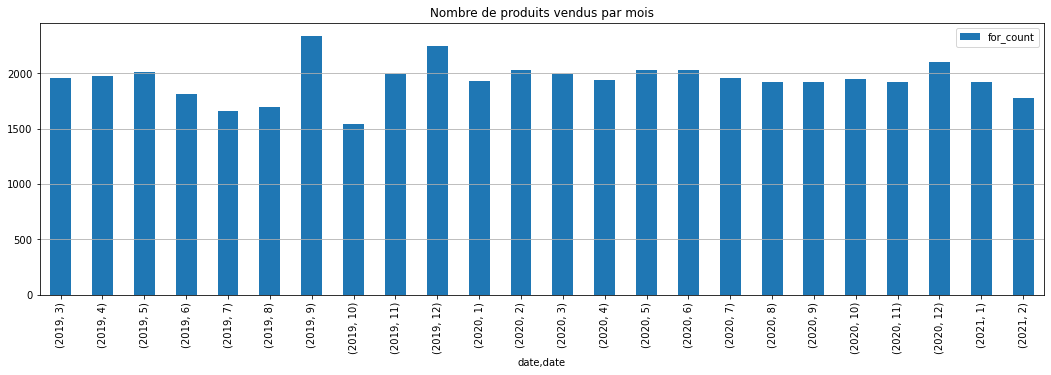

In [9]:
# Pour éviter le warning lors de la création de la colonne 'for_count'
pd.options.mode.chained_assignment = None  # default='warn'

# Répartition du nombre de ventes par année et par mois

 # création d'une colonne pour compter les lignes
temp_df['for_count'] = 1
temp_df.head()

# Regroupement des lignes pour une même année et un même mois par une somme
month_count =temp_df.groupby([(pd.DatetimeIndex(temp_df['date']).year),(pd.DatetimeIndex(temp_df['date']).month)]).sum()

# Diagramme du nombre de produits vendus par mois et par année
ax = month_count.plot(kind='bar', y = 'for_count')
plt.title('Nombre de produits vendus par mois')
plt.grid(axis = 'y')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

Les achats des 4 clients "outliers" sont assez uniformément réparties sur l'ensemble de la période, ce qui semble indiquer qu'il n'y a pas de doublons d'achats.

### Recherche de doublons de produits :

Vérification que les produits achetés plusieurs fois par session ne soient pas des doublons :

In [10]:
# Table pivot du nombre de produits achetés par session
prod_per_session = pd.pivot_table(temp_df,
                         values='for_count',
                         aggfunc='sum',
                         index=['session_id','id_prod'])

# Dataframe des sessions où un produit a été ahceté plusieurs fois
products = prod_per_session.loc[prod_per_session['for_count']>1]

# transformation des index du dataframe en colonnes
products.reset_index(inplace=True)

# Vérification
products.head()

,session_id,id_prod,for_count
0,s_112282,2_207,2
1,s_121210,0_1541,2
2,s_1255,1_498,2
3,s_127316,1_97,2
4,s_133559,0_1590,2


In [11]:
# Stockage des sessions où un produit a été acheté plusieurs fois
sessions = products['session_id']

# Stockage des produits achetés plusieurs fois dans une même session
products_duplicated = products['id_prod'] 

# Filtre sur les lignes du Dataframe de base où apparaît ces sessions
result = df.loc[df['session_id'].isin(sessions)]

# Filtre sur les lignes du dataframe result où apparaît les produits
# achetés plusieurs fois par session
result = result.loc[df['id_prod'].isin(products_duplicated)]

# Affichage des lignes des produits achetés plusieurs fois dans la même session par les 'outliers'
result.sort_values(by=['session_id'])

,id_prod,date,session_id,client_id,sex,birth,price,categ
435625,2_207,2019-10-30 13:27:08.293276,s_112282,c_4958,m,1999.0,50.99,2.0
435646,2_207,2019-10-30 13:08:09.204211,s_112282,c_4958,m,1999.0,50.99,2.0
397128,0_1541,2019-11-18 00:19:05.052634,s_121210,c_1609,m,1980.0,11.99,0.0
397112,0_1541,2019-11-18 00:30:22.643652,s_121210,c_1609,m,1980.0,11.99,0.0
72158,1_498,2019-03-03 16:56:02.135002,s_1255,c_6714,f,1968.0,23.37,1.0
72181,1_498,2019-03-03 16:48:28.800962,s_1255,c_6714,f,1968.0,23.37,1.0
563338,1_97,2019-11-30 14:19:25.508328,s_127316,c_6714,f,1968.0,23.99,1.0
563339,1_97,2019-11-30 13:24:08.746742,s_127316,c_6714,f,1968.0,23.99,1.0
550610,0_1590,2019-12-13 03:21:27.251393,s_133559,c_1609,m,1980.0,18.93,0.0
550614,0_1590,2019-12-13 02:54:37.139037,s_133559,c_1609,m,1980.0,18.93,0.0


##### Pour ces lignes montrant les produits achetés plusieurs fois dans une même session, la seule colonne qui diffère est la date.

##### Rien ne nous permet de penser que ce sont des doublons car les heures d'achat diffèrent de quelques secondes ou quelques minutes.

##### Il paraît toutefois étrange qu'il n'y ait jamais eu de produits ayant été achetés plus de 2 fois lors d'une même session.

## Histogramme du nombre de ventes par produit

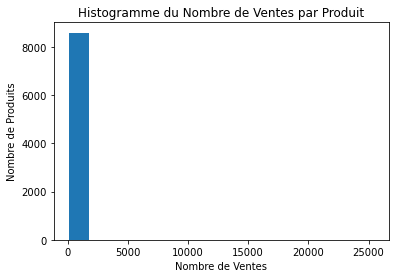

In [12]:
# nombre optimal de classes pour l'histogramme (règle de Sturges)
import math
sturges = int(1+math.log2(len(client_id_count)))

# Histogramme
plt.hist(client_id_count['client_id'], bins=sturges, rwidth=0.90)
plt.title('Histogramme du Nombre de Ventes par Produit') #Titre du graphique
plt.xlabel('Nombre de Ventes') # Titre de l'axe des abscisses
plt.ylabel('Nombre de Produits') # Titre de l'axe des ordonnées
plt.show()

Les 4 outliers sur le haut de la distribution agrandissent l'échelle de l'axe des abscisses jusqu'à 25000.

Donc création d'un histogramme excluant ces 4 outliers.

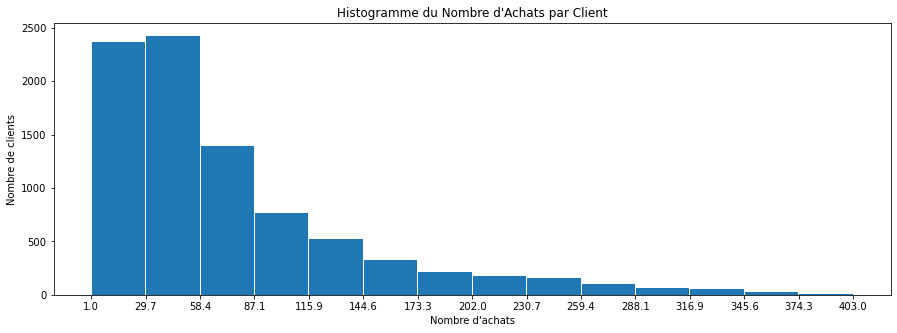

In [13]:
# Suppression des outliers
client_id_count = client_id_count[client_id_count['client_id'] < 404]

# nombre optimal de classes pour l'histogramme (règle de Sturges)
import math
sturges = int(1+math.log2(len(client_id_count)))

# Histogramme
n, bins, patches = plt.hist(client_id_count['client_id'], bins=sturges, rwidth=0.98)
plt.xticks(bins)
fig = plt.gcf()
fig.set_size_inches(15, 5)
plt.title('Histogramme du Nombre d\'Achats par Client') #Titre du graphique
plt.xlabel('Nombre d\'achats')# Titre de l'axe des abscisses
plt.ylabel('Nombre de clients') # Titre de l'axe des ordonnées
plt.show()

La queue de la distribution est étalée et aplatie à droite, et quasi-inexistante à gauche.

## Conlusion analyse univariée client_id :

- 4 clients sont des outliers sur le haut de la distribution :
    - c_1609 : 25 488 articles achetés.
    - c_6714 : 9 187 articles achetés.
    - 2 autres clients entre 5 000 et 10 000 (c_3454 et c_4958)
    - WARNING : est-i plausible que des clients individuels achètent autant ? Entreprises individuelles ? Entreprises obligées de renseigner une fiche client mentionnant le genre ?

- A part ces 4 "grands" clients, la distribution est ramassée pour 50% d'entre eux sur le bas de la distribution (de 1 à 51) et plus étalée pour les 50% du haut de la distribution (de 51 à 403 excepté les 4 "grands" clients).

# <a name="C2.1">Id_prod</a>

## Description des données

In [14]:
df.id_prod.describe()

count     679111
unique      3265
top        1_369
freq        2252
Name: id_prod, dtype: object

3 266 produits différents ont été vendus.

Le produit 1_369 est le plus vendu (2 252 fois).

Calcul du nombre de ventes par produit.

Top 30 des produits les plus achetés

Description du décompte obtenu :
- Boxplot
- Statistiques descriptives

1_369    2252
1_417    2189
1_414    2180
1_498    2128
1_425    2096
1_403    1960
1_412    1951
1_413    1945
1_406    1939
1_407    1935
1_396    1921
1_398    1917
1_395    1875
1_400    1839
1_392    1825
1_376    1809
1_397    1799
1_385    1798
1_388    1792
1_381    1781
1_389    1776
1_383    1776
1_378    1732
1_379    1708
1_431    1664
1_374    1655
1_426    1654
1_366    1647
1_493    1599
1_367    1588
Name: id_prod, dtype: int64


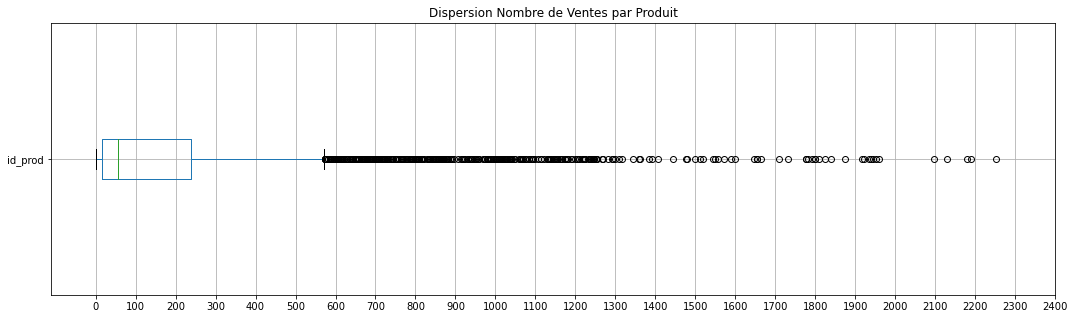

,id_prod
count,3265.000000
mean,207.997243
std,331.361777
min,1.000000
25%,17.000000
50%,57.000000
75%,239.000000
max,2252.000000


In [15]:
id_prod_count = df['id_prod'].value_counts()
print(id_prod_count[0:30]) # vérification et top 30 des produits les plus vendus

id_prod_count = pd.DataFrame(id_prod_count) # transformation en DataFrame

# boxplot du décompte
ax = id_prod_count.boxplot(column='id_prod', vert=False)
plt.title('Dispersion Nombre de Ventes par Produit')
plt.xticks(np.arange(0, 2500, step=100))
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

# Statistiques descriptives du décompte
id_prod_count.describe()

## Histogramme du nombre de ventes par produit

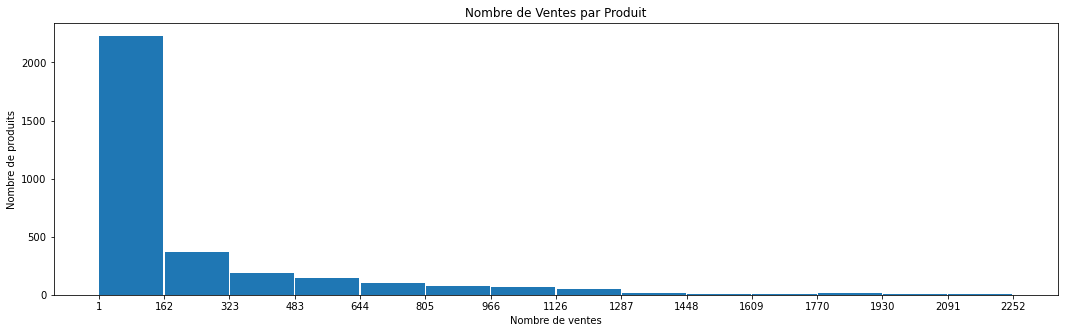

In [16]:
# nombre optimal de classes pour l'histogramme (règle de Sturges)
import math
sturges = int(1+math.log2(len(client_id_count)))

# Histogramme
n, bins, patches = plt.hist(id_prod_count['id_prod'], bins=sturges, rwidth=0.98)
plt.xticks(bins)
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.title('Nombre de Ventes par Produit') #Titre du graphique
plt.xlabel('Nombre de ventes')# Titre de l'axe des abscisses
plt.ylabel('Nombre de produits') # Titre de l'axe des ordonnées
plt.show()

L'histogramme permet de visualiser la queue de la distribution étalée et aplatie à droite et inexistante à gauche.

## Conclusion analyse univariée de id_prod

Plus la distribution va vers le haut, plus la distribution est étalée :
- de 1 à 57 pour les 50% du bas
- de 57 à 2252 pour les 50% du haut

La moyenne est fortement tirée vers le haut, comparativement à la médiane, en raison des nombreux outliers sur le haut de la distribution.

# <a name="C3">session_id</a>

## Description des données

In [17]:
df.session_id.describe()

count       679111
unique      342275
top       s_118668
freq            14
Name: session_id, dtype: object

Il y a eu 342 315 sessions ayant abouti à un achat.

La session s_118668 a fait l'objet de 14 ventes de produits (session avec le plus de ventes).

- Calcul du nombre de ventes par produit.

- Description du décompte obtenu :
    - Diagramme en bâtons
    - Statistiques descriptives

count    342275.000000
mean          1.984109
std           1.271920
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: session_id, dtype: float64


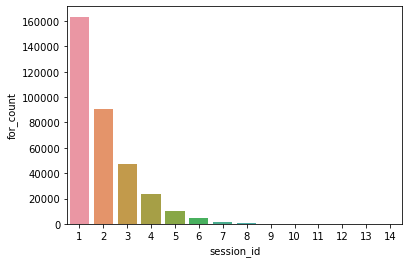

    session_id  for_count  frequency
0            1     163353   0.477257
1            2      90611   0.264732
2            3      47381   0.138430
3            4      23648   0.069091
4            5      10204   0.029812
5            6       4274   0.012487
6            7       1829   0.005344
7            8        609   0.001779
8            9        252   0.000736
9           10         79   0.000231
10          11         23   0.000067
11          12          6   0.000018
12          13          5   0.000015
13          14          1   0.000003


In [18]:
session_id_count = df['session_id'].value_counts()

# Affichage des statistiques descriptives du décompte
print(session_id_count.describe())

# Transformation de l'objet Series en Dataframe
session_id_count = session_id_count.to_frame()
# transformation des index du dataframe en colonnes
session_id_count.reset_index(inplace=True)
# Création d'une colonne pour compter les lignes
session_id_count['for_count'] = 1
# Table pivot du nombre de produits achetés par session
temp_df = pd.pivot_table(session_id_count,
                         values='for_count',
                         aggfunc='sum',
                         index='session_id')
# transformation des index du dataframe en colonnes
temp_df.reset_index(inplace=True)
# Rajout de la colonne fréquence
temp_df['frequency'] = temp_df['for_count'] / len(session_id_count)

# Diagramme en bâtons du nombre de produits achetés par session
ax = sns.barplot(x='session_id', y="for_count", data=temp_df)
plt.show()

# Affichage du nombre de produits achetés par session et de la fréquence
print(temp_df)

En moyenne, les clients achètent 2 produits par session (médiane au même niveau).

Sur 342 275 sessions, 163 353 sessions à un achat (environ 47% de la distribution).

Le nombre de sessions diminue très rapidement à mesure que le nombre de produits achetés augmente.

# <a name="C4">sex</a>

Description des données :

In [19]:
df.sex.describe()

count     679111
unique         2
top            m
freq      340826
Name: sex, dtype: object

Variable qualitative nominale (homme et femme).

Les hommes sont les clients qui ont acheté le plus de produits (340 930), même si la répartition est égalitaire.

Répartition du nombre de produits achetés entre hommes et femmes.

Tableau de la répartition

Piechart de cette répartition

m    340826
f    338285
Name: sex, dtype: int64


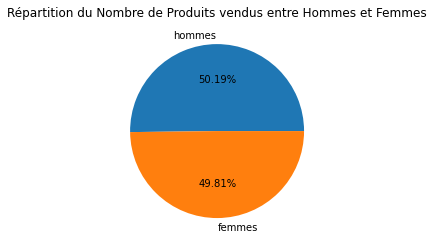

In [20]:
sex_count = df.sex.value_counts()

print(sex_count) # tableau de la répartition

# piechart
plt.pie(sex_count, labels = ['hommes','femmes'],autopct='%.2f%%')
plt.title('Répartition du Nombre de Produits vendus entre Hommes et Femmes')
plt.show()


##### Conclusion

Il s'agit d'une variable qualitative nominale.

La répartition du nombre de produits achetés en fonction du genre est quasi-égalitaire.


# <a name="C5">birth</a>

Description des données :
- statistiques descriptives

In [21]:
df.birth.describe()

count    679111.000000
mean       1977.811149
std          13.575361
min        1929.000000
25%        1970.000000
50%        1980.000000
75%        1987.000000
max        2004.000000
Name: birth, dtype: float64

Variable qualitative nominale : âge des clients nés entre 1929 et 2004.

Calcul de l'âge des clients selon la date des sessions (en partant du principe qu'ils sont nés le 1er janvier à 00:00:00.000000) :

In [22]:
df['age'] = pd.DatetimeIndex(df['date']).year - df['birth']
df.head() # vérification

,id_prod,date,session_id,client_id,sex,birth,price,categ,age
0,0_1518,2020-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,34.0
1,0_1518,2019-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,33.0
2,0_1518,2020-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,34.0
3,0_1518,2019-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,51.0
4,0_1518,2020-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,52.0


Répartition du nombre de produits achetés en fonction de l'âge.

Tableau de la répartition.

Diagramme de cette répartition.

15.0     5935
16.0     9636
17.0     5408
18.0     4430
19.0     4305
20.0     6775
21.0     7562
22.0     5223
23.0     5394
24.0     5701
25.0     5477
26.0     5032
27.0     5220
28.0    10457
29.0    16226
30.0    17048
31.0    20054
32.0    21932
33.0    22047
34.0    19339
35.0    17735
36.0    20362
37.0    20802
38.0    19963
39.0    30837
40.0    35584
41.0    26462
42.0    22837
43.0    19297
44.0    17612
45.0    18699
46.0    18002
47.0    16825
48.0    13109
49.0     9873
50.0    11427
51.0    15691
52.0    13930
53.0     8629
54.0     7676
55.0     8397
56.0     7650
57.0     6308
58.0     4878
59.0     4761
60.0     5957
61.0     5992
62.0     5459
63.0     6770
64.0     6989
65.0     5309
66.0     4577
67.0     4299
68.0     3138
69.0     3034
70.0     3282
71.0     2864
72.0     2147
73.0     1691
74.0     1872
75.0     1640
76.0     1115
77.0     1601
78.0     2098
79.0     1656
80.0     1530
81.0     1166
82.0      893
83.0      923
84.0      571
85.0      412
86.0  

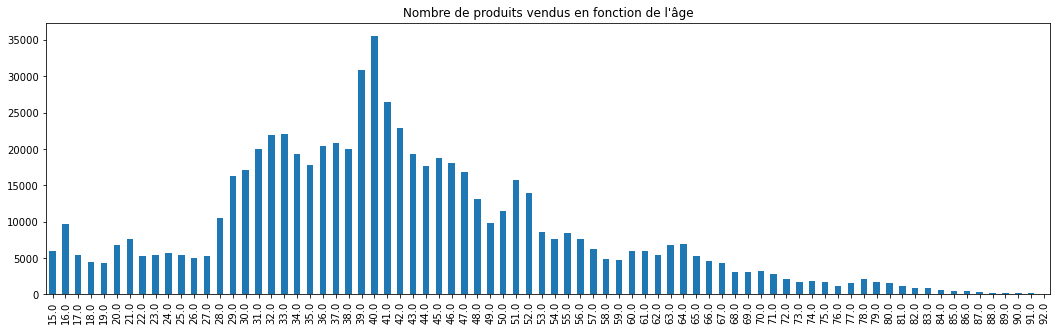

In [23]:
age_count = df['age'].value_counts().sort_index(ascending=True)

print(age_count) # vérification et tableau de la répartition

# Diagramme en bâtons de cette répartition
ax = age_count.plot(kind='bar')
plt.title('Nombre de produits vendus en fonction de l\'âge')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

##### Conclusion

Il s'agit d'une variable qualitative ordinale qui peut ausi être vue comme une variable quantitative discrète.

La répartition du nombre de produits vendus en fonction de l'âge semble cohérente :
- Plus on avance en âge et moins on achète sur Internet.
- Plus on est jeune et plus le pouvoir d'achat est réduit.
- Les plus susceptibles d'acheter, les trentenaires et quarantenaires, car ils ont un meilleur pouvoir d'achat et sont habitués à acheter sur Internet, sont ceux qu achètent le plus.

# <a name="C6">price</a>

Description des données :
- Boxplot
- Statistiques descriptives
- Histogramme

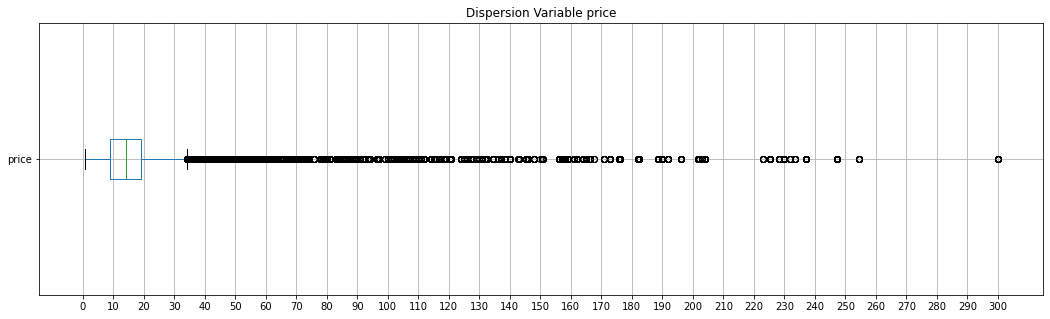

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [24]:
ax = df.boxplot(column='price', vert=False)
plt.title('Dispersion Variable price')
plt.xticks(np.arange(0, 310, step=10))
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()


df['price'].describe()

## Vérification des outliers

In [25]:
outliers = df.loc[df['price'] > (18.99+(18.99-8.87)*1.5)] # stockage des outliers
outliers.describe() # Vérification et description

,birth,price,categ,age
count,42606.000000,42606.000000,42606.000000,42606.000000
mean,1992.936018,72.073492,1.850819,26.752077
std,13.171355,38.366877,0.367300,13.186064
min,1929.000000,34.180000,0.000000,15.000000
25%,1992.000000,49.990000,2.000000,19.000000
50%,1997.000000,60.370000,2.000000,23.000000
75%,2001.000000,69.990000,2.000000,27.000000
max,2004.000000,300.000000,2.000000,92.000000


Catégories des outliers :

2.0    36420
1.0     6016
0.0      170
Name: categ, dtype: int64


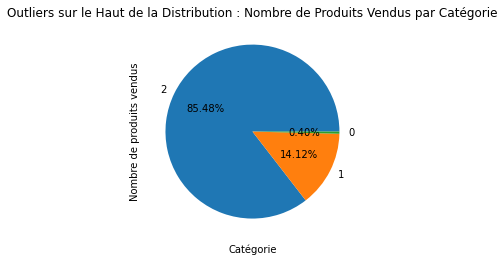

In [26]:
# Décompte des catégories :
outliers_categ_count = outliers['categ'].value_counts()

# Tableau du nombre de produits vendus par catégorie
print(outliers_categ_count)

# Piechart du nombre de produis vendus par catégorie
ax = plt.pie(outliers_categ_count, labels = ['2','1','0'], autopct='%.2f%%')
plt.title('Outliers sur le Haut de la Distribution : Nombre de Produits Vendus par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits vendus')
plt.show()

Ces outliers semblent être justifiés par les prix pratiqués pour chaque catégorie (cf ANOVA price-categ). Plus les prix pratiqués pour chaque catégorie sont élevés, plus la catégorie est représentée dans les outliers sur le haut de la distribution de la variable price.

Il faudrait pouvoir vérifier ces outliers en fonction du type de produit (bande dessinée, livres de collection, ...?) mais nous n'avons pas d'informations à ce sujet.

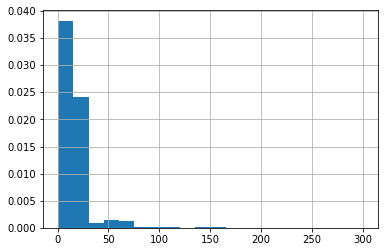

In [27]:
# nombre optimal de classes pour l'histogramme (règle de Sturges)
import math
sturges = int(1+math.log2(len(df)))

# Histogramme
df['price'].hist(density=True, bins=sturges)
plt.show()

##### Conclusion

C'est une variable quantitative.

La dispersion montre :
- une concentration des 50% du bas la distribution (de 0.62 à 13.99).
- une plus grande dispersion pour les 50% du haut (de 13.99 à 300).
- nombreux outliers : il faudrait pouvoir vérifier s'il n'y a pas de valeurs aberrantes (il n'y a aucun moyen de le faire avec les données dont on dispose).

# <a name="C7">categ</a>

Description des données :
- Nombre de produits vendus par catégorie
- Piechart de la répartition

0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64


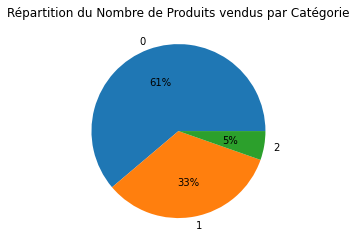

In [28]:
categ_count = df.categ.value_counts()

print(categ_count) # tableau de la répartition

# piechart
plt.pie(categ_count, labels = ['0','1','2'],autopct='%.0f%%')
plt.title('Répartition du Nombre de Produits vendus par Catégorie')
plt.show()

##### Conclusion

Il s'agit d'une variable qualitative nominale.

La catégorie 0 est, en nombre de produits vendus,majoritaire (61%), la catégorie 1 représente 1/3 des ventes et la catégorie 2 représente 5%.

# <a name="C8">date</a>

Description des données :

In [29]:
df['date'].describe()

count                         679111
unique                        679111
top       2020-01-27 19:21:31.500525
freq                               1
Name: date, dtype: object

Transformation en type datetime : 

In [30]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S.%f',errors='coerce')

vérification

In [31]:
df['date'].dtypes

dtype('<M8[ns]')

vérification validée

Répartition du nombre de ventes par mois :

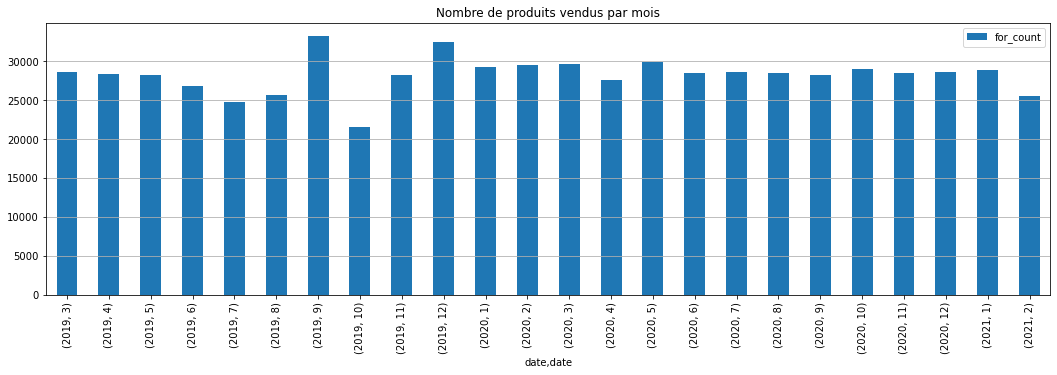

In [32]:
# Répartition du nombre de ventes par année et par mois

 # création d'une colonne pour compter les lignes
df['for_count'] = 1
# Regroupement des lignes pour une même année et un même mois par une somme
month_count =df.groupby([(pd.DatetimeIndex(df['date']).year),(pd.DatetimeIndex(df['date']).month)]).sum()

# Diagramme du nombre de produits vendus par mois et par année
ax = month_count.plot(kind='bar', y = 'for_count')
plt.title('Nombre de produits vendus par mois')
plt.grid(axis = 'y')
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.show()

##### Conclusion
WARNING : on constate que le mois d'octobre de l'année 1 a connu une baisse sensible du nombre de produits vendus. Cette baisse ponctuelle semble ne pas suivre la tendance générale. Cela indique peut-être un problème dans les données.

Suppression de la colonne for_count et vérification :

In [33]:
df.drop(['for_count'], axis = 1, inplace=True)
df.head()

,id_prod,date,session_id,client_id,sex,birth,price,categ,age
0,0_1518,2020-05-20 13:21:29.043970,s_211425,c_103,f,1986.0,4.18,0.0,34.0
1,0_1518,2019-07-20 13:21:29.043970,s_64849,c_103,f,1986.0,4.18,0.0,33.0
2,0_1518,2020-08-20 13:21:29.043970,s_255965,c_103,f,1986.0,4.18,0.0,34.0
3,0_1518,2019-05-09 11:52:55.100386,s_32104,c_6714,f,1968.0,4.18,0.0,51.0
4,0_1518,2020-05-30 01:17:07.487046,s_216118,c_6714,f,1968.0,4.18,0.0,52.0


# <a name="C15">test de la normalité de la variable price</a>

## Histogramme et distribution normale

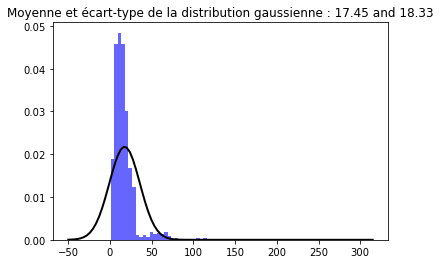

In [34]:
## HISTOGRAMME

# Tracé de l'histogramme
plt.hist(df['price'], bins=70, density=True, alpha=0.6, color='b')

## DISTRIBUTION GAUSSIENNE
# Calcul de la moyenne et de l'écart-type
from scipy.stats import norm
mu, std = norm.fit(df['price'])
# paramétrage des x
xmin, xmax = plt.xlim()
x = np.linspace(-50, xmax, 100)
# Calcul des coordonnées
p = norm.pdf(x, mu, std)
# Tracé de la distribution gaussienne
plt.plot(x, p, 'k', linewidth=2)
# Titre affichant la moyenne et l'écart-type
title = "Moyenne et écart-type de la distribution gaussienne : {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

## AFFICHAGE DES DEUX GRAPHIQUES
plt.show()

## Quantile-quantile plot :

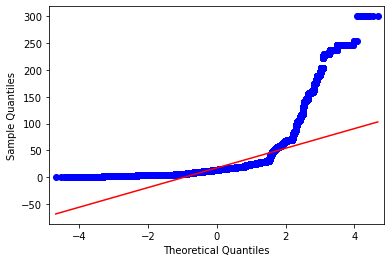

In [35]:
>>> import statsmodels.api as sm
>>> from matplotlib import pyplot as plt

# Tracé des graphiques : line="s" permet de comparer à une distribution normale avec la même moyenne et le même écart-type
# que la variable
>>> fig = sm.qqplot(df['price'], line="s")
>>> plt.show()

La variable n'a pas une distribution normale. Les tests paramétriques basés sur la loi normale ne peuvent pas être utilisés, notament le test t de Student.

# <a name="C15.1">test de la normalité de la variable age</a>

## Histogramme et distribution normale

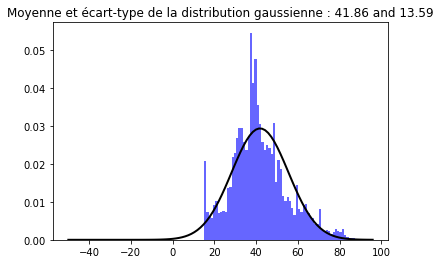

In [36]:
## données :
X=df['age']

## HISTOGRAMME

# Tracé de l'histogramme
plt.hist(X, bins=70, density=True, alpha=0.6, color='b')

## DISTRIBUTION GAUSSIENNE
# Calcul de la moyenne et de l'écart-type
from scipy.stats import norm
mu, std = norm.fit(X)
# paramétrage des x
xmin, xmax = plt.xlim()
x = np.linspace(-50, xmax, 100)
# Calcul des coordonnées
p = norm.pdf(x, mu, std)
# Tracé de la distribution gaussienne
plt.plot(x, p, 'k', linewidth=2)
# Titre affichant la moyenne et l'écart-type
title = "Moyenne et écart-type de la distribution gaussienne : {:.2f} and {:.2f}".format(mu, std)
plt.title(title)

## AFFICHAGE DES DEUX GRAPHIQUES
plt.show()

## Quantile-quantile plot :

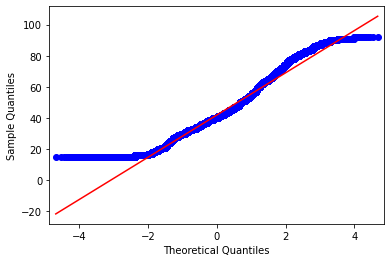

In [37]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

# Données d'entrée :
X=df['age']

# Tracé des graphiques : line="s" permet de comparer à une distribution normale avec la même moyenne et le même écart-type
# que la variable

fig = sm.qqplot(X, line="s")
plt.show()

##### La variable n'a pas une distribution normale. Les tests paramétriques basés sur la loi normale ne peuvent pas être utilisés, notament le test t de Student.

# <a name="C16">age - price (Spearman, Kendall et ANOVA)</a>

On peut considérer que la variable birth est une variable quantitative discrète.

On peut donc faire un nuage de points pour étudier, si besoin, une corrélation éventuelle (tests non-paramétriques de Spearman ou Kendall).

## Nuage de points

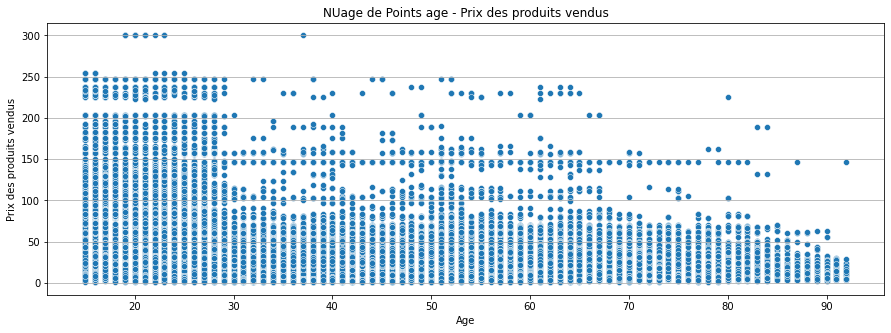

In [38]:
DATA= df
X='age'
Y='price'

ax = sns.scatterplot(data=DATA, x=X, y=Y)
plt.gcf().set_size_inches(15, 5) # Dimensions du graphique
plt.title('NUage de Points age - Prix des produits vendus') #Titre du graphique
plt.xlabel('Age')# Titre de l'axe des abscisses
plt.ylabel('Prix des produits vendus') # Titre de l'axe des ordonnées
plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y
# plt.show() # Affichage du graphique

On pourrait éventuellement constater une corrélation négative (plus les clients avancent en âge, moins le prix des produits vendus est élevé).

Tests de Spearman et de Kendall :

## Spearman :
- H0 : le coefficient de corrélation entre les 2 variables étudiées est égal à 0.
- H1 : le coefficient de corrélation entre les 2 variables étudiées est significativement différent de 0.

In [39]:
# Calcul du coefficient de Spearman et de la p-value

DATA = df
X = 'age'
Y = 'price'
LENGTH = len(DATA)

r, p = stats.spearmanr(DATA[X], DATA[Y])
print('correlation : ',r,'\n','p-value : ', p)

# Calcul de l'intervalle de confiance à 95%
import math
num = LENGTH
stderr = 1.0 / math.sqrt(num - 3) # approximation
delta = 1.96 * stderr
lower = math.tanh(math.atanh(r) - delta)
upper = math.tanh(math.atanh(r) + delta)
print('intervalle de confiance : ',"lower %.6f upper %.6f" % (lower, upper))

correlation :  -0.053944084905095134 
 p-value :  0.0
intervalle de confiance :  lower -0.056315 upper -0.051572


L'hypothèse H0 est rejetée car :
- le seuil de significativité, ou risque d'erreur, est égal à 0, donc la corrélation trouvée n'est pas due au hasard.
- le coefficient est égal à -0.05 : il y a une très légère corrélation négative entre l'âge et le prix des produits vendus.


## Corrélation de Kendall
- H0 : le coefficient de corrélation entre les 2 variables étudiées n'est pas différent de 0.
- H1 : le coefficient de corrélation entre les 2 variables étudiées est significativement différent de 0.

In [40]:
from scipy.stats import kendalltau 

tau, p = kendalltau(DATA[X], DATA[Y]) 
print('correlation : ',tau,'\n','p-value : ',p)

correlation :  -0.03284110860229739 
 p-value :  0.0


H0 est rejetée car :
- le seuil de significativité, ou risque d'erreur, est égal à 0.
- le coefficient est égal à -0.03 : la légère corrélation négative entre âge et prix est confirmée.

## Conclusion sur la corrélation âge-prix

Il y a une légère corrélation négative entre l'âge et le prix de produits achetés (environ -5%). Mais cette corrélation n'explique que le comportement des 41-92 ans mais pas celui des 15-40 ans (cf diagramme somme du CA par âge). 

On peut aussi considérer la variable birth comme une variable qualitative pour expliquer l'impact de l'âge sur le prix des produits vendus grâce à une ANOVA.

## ANOVA

## Segmentation de la variable age

### Diagramme du total du CA en fonction de l'âge :

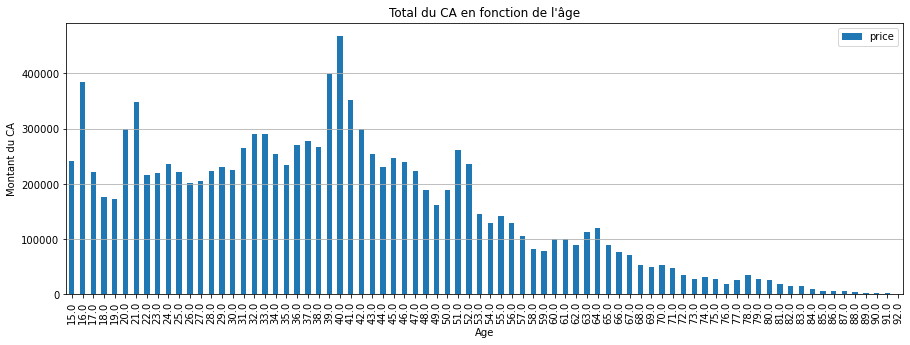

In [41]:
# Calcul du total du Chiffre d'affaires en fonction de l'âge
temp_df = pd.pivot_table(df,
                         values='price',
                         aggfunc='sum',
                         index='age')

# Données d'entrée
DATA = temp_df
X = 'age'
Y = 'price'

# Diagramme de la somme du CA en fonction de l'âge
ax = DATA.plot(kind='bar') # Tracé du graphique
plt.gcf().set_size_inches(15, 5) # Dimensions du graphique
plt.title('Total du CA en fonction de l\'âge') #Titre du graphique
plt.xlabel('Age')# Titre de l'axe des abscisses
plt.ylabel('Montant du CA') # Titre de l'axe des ordonnées
plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y
# plt.show() # Affichage du graphique

### Diagramme de la moyenne du CA en fonction de l'âge :

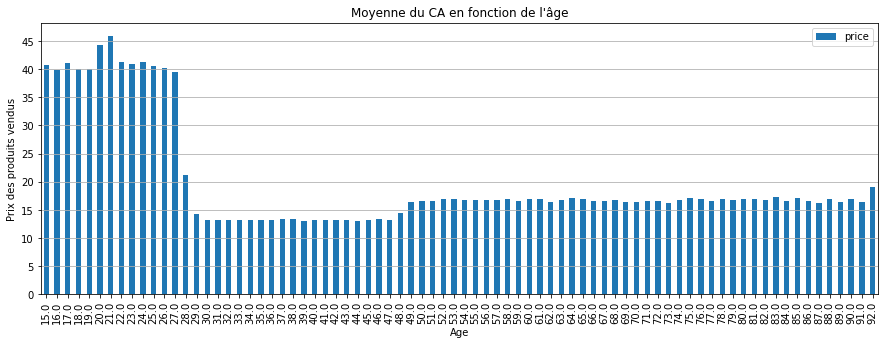

In [42]:
# Calcul du total du Chiffre d'affaires en fonction de l'âge
temp_df = pd.pivot_table(df,
                         values='price',
                         aggfunc='mean',
                         index='age')

# Diagramme

# Données d'entrée
DATA = temp_df
X = 'age'
Y = 'price'

ax = DATA.plot(kind='bar') # Tracé du graphique
plt.gcf().set_size_inches(15, 5) # Dimensions du graphique
plt.title('Moyenne du CA en fonction de l\'âge') #Titre du graphique
plt.xlabel('Age')# Titre de l'axe des abscisses
plt.ylabel('Prix des produits vendus') # Titre de l'axe des ordonnées
plt.yticks(np.arange(0, 50, step=5))
plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y
plt.show() # Affichage du graphique
plt.show()

### Création des segments 1

On peut segmenter de la manière suivante en suivant le diagramme du total du chiffre d'affaires en fonction de l'âge:
- 15-27 ans :
    - Total du CA sans réelle tendance
- 28-40 ans :
    - tendance générale à l'accroissement du chiffre d'affaires
- 41 et + :
    - tendance générale à la décroissance du chiffre d'affaires

In [43]:
cut_labels = ['15-27 ans','28-40 ans','41 ans et +']
cut_bins = [0,27,40,120]
df['age_range'] = pd.cut(df['age'],
                              bins=cut_bins,
                              labels=cut_labels)

Vérification :

In [44]:
print(df[['age','age_range']][df['age'] == 27].head(1))
print(df[['age','age_range']][df['age'] == 28].head(1))
print(df[['age','age_range']][df['age'] == 40].head(1))
print(df[['age','age_range']][df['age'] == 41].head(1))

       age  age_range
1065  27.0  15-27 ans
      age  age_range
123  28.0  28-40 ans
     age  age_range
23  40.0  28-40 ans
     age    age_range
25  41.0  41 ans et +


### Représentation des boxplots avec la moyenne par catégorie :

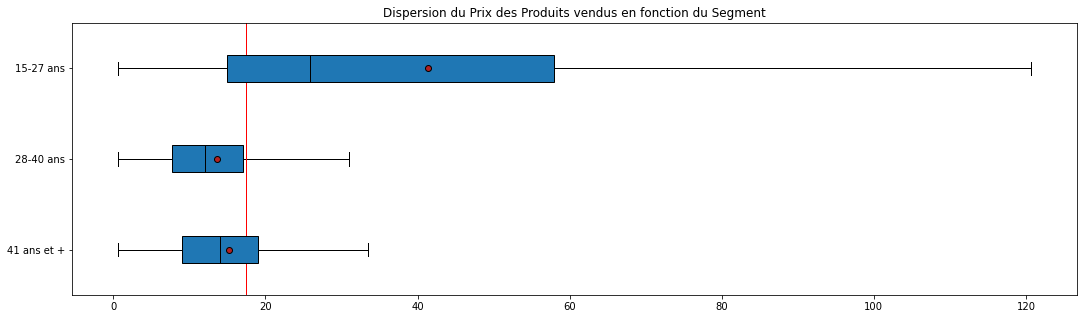

In [45]:
# Assignation des variables
DF = df
QUALI = 'age_range'
QUANTI = 'price'

modalities = DF[QUALI].unique()
modalities = modalities.sort_values(ascending=False)
groups = []
for i in modalities:
    groups.append(DF[DF[QUALI]==i][QUANTI])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = DF[QUANTI].mean()
plt.axvline(x=mean, color='red', linewidth=1)

# titre
plt.title('Dispersion du Prix des Produits vendus en fonction du Segment')

plt.show()

### Calcul du eta squared :

In [46]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df['age_range'],df['price'])

0.21585697075150423

Cette segmentation discrimine le chiffre d'affaires à hauteur de 21.58%.

Cette variation s'explique en grande partie, graphiquement, par le prix des produits achetés par le segment 15-26 ans.

### Création des segments 2

On peut segmenter de la manière suivante en suivant le diagramme de la moyenne du chiffre d'affaires en fonction de l'âge :
- 15-27 ans :
    - moyenne du prix des produits vendus aux alentours de 40 €
- 28-48 ans :
    - moyenne du prix des produits vendus un peu en-dessous de 15 €
- 49 et + :
    - moyenne du prix des produits vendus légèrement supérieur à 15 €

In [47]:
cut_labels = ['15-27 ans','28-48 ans','49 ans et +']
cut_bins = [0,27,48,120]
df['age_range'] = pd.cut(df['age'],
                              bins=cut_bins,
                              labels=cut_labels)

Vérification :

In [48]:
print(df[['age','age_range']][df['age'] == 27].head(1))
print(df[['age','age_range']][df['age'] == 28].head(1))
print(df[['age','age_range']][df['age'] == 48].head(1))
print(df[['age','age_range']][df['age'] == 49].head(1))

       age  age_range
1065  27.0  15-27 ans
      age  age_range
123  28.0  28-48 ans
      age  age_range
120  48.0  28-48 ans
      age    age_range
118  49.0  49 ans et +


### Représentation des boxplots avec la moyenne par catégorie :

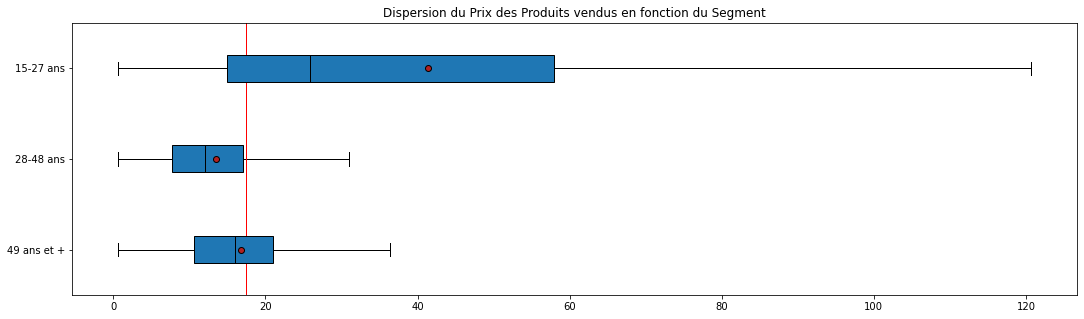

In [49]:
# Assignation des variables
DF = df
QUALI = 'age_range'
QUANTI = 'price'

modalities = DF[QUALI].unique()
modalities = modalities.sort_values(ascending=False)
groups = []
for i in modalities:
    groups.append(DF[DF[QUALI]==i][QUANTI])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = DF[QUANTI].mean()
plt.axvline(x=mean, color='red', linewidth=1)

# titre
plt.title('Dispersion du Prix des Produits vendus en fonction du Segment')

plt.show()

Moyenne du prix des produits vendus :

In [50]:
df['price'].mean()

17.454773490723493

Moyenne du prix des produits achetés par segment d'âge :

In [51]:
mean_per_age_range = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='mean',
                         index='age_range')
mean_per_age_range

,price
age_range,
15-27 ans,41.334639
28-48 ans,13.477451
49 ans et +,16.746403


### Calcul du eta squared :

In [52]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df['age_range'],df['price'])

0.2200789719547834

Cette segmentation discrimine le chiffre d'affaires à hauteur de 22%.

Cette variation s'explique en grande partie, graphiquement, par le prix des produits achetés par le segment 15-26 ans.

### Création des segments 3

On peut aussi segmenter de la manière suivante en suivant le diagramme de la moyenne du chiffre d'affaires en fonction de l'âge :
- 15-27 ans :
    - moyenne du prix des produits vendus aux alentours de 40 €
- 28 et + :
    - moyenne du prix des produits vendus aux alentours de 15 €

In [53]:
cut_labels = ['15-27 ans','28 et +']
cut_bins = [0,27,120]
df['age_range'] = pd.cut(df['age'],
                              bins=cut_bins,
                              labels=cut_labels)

Vérification :

In [54]:
print(df[['age','age_range']][df['age'] == 27].head(1))
print(df[['age','age_range']][df['age'] == 28].head(1))
print(df[['age','age_range']][df['age'] == 90].head(1))

       age  age_range
1065  27.0  15-27 ans
      age age_range
123  28.0   28 et +
       age age_range
3714  90.0   28 et +


### Représentation des boxplots avec la moyenne par catégorie :

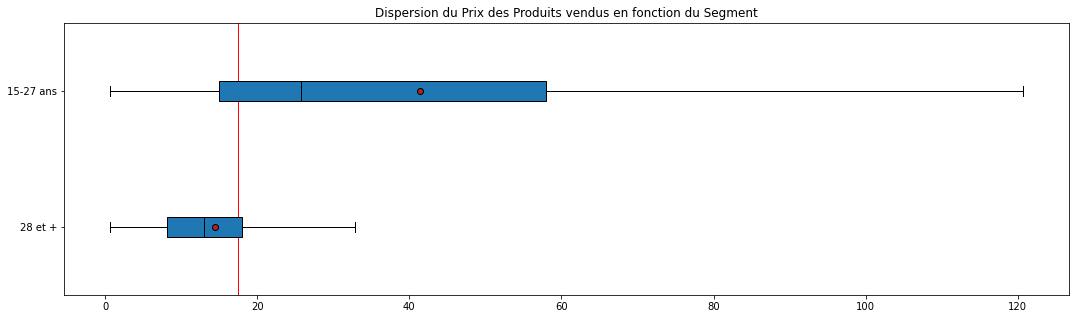

In [55]:
# Assignation des variables
DF = df
QUALI = 'age_range'
QUANTI = 'price'

modalities = DF[QUALI].unique()
modalities = modalities.sort_values(ascending=False)
groups = []
for i in modalities:
    groups.append(DF[DF[QUALI]==i][QUANTI])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = DF[QUANTI].mean()
plt.axvline(x=mean, color='red', linewidth=1)

# titre
plt.title('Dispersion du Prix des Produits vendus en fonction du Segment')

plt.show()

Moyenne du prix des produits vendus :

In [56]:
df['price'].mean()

17.454773490723493

Moyenne du prix des produits achetés par segment d'âge :

In [57]:
mean_per_age_range = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='mean',
                         index='age_range')
mean_per_age_range

,price
age_range,
15-27 ans,41.334639
28 et +,14.441223


### Calcul du eta squared :

In [58]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df['age_range'],df['price'])

0.2142069397455083

Cette segmentation discrimine le chiffre d'affaires à hauteur de 21,42%.

Cette variation s'explique en grande partie, graphiquement, par le prix des produits achetés par le segment 15-26 ans.

##### Conclusion sur la segmentation

La segmentation 2 est un tout petit peu plus performante (22% par rapport à 21.58% et 21.42%):
- 15-27 ans
- 28 ans- 48 ans
- 49 ans et +

### conclusion générale sur l'analyse bivariée âge-prix:
- Les coefficients de Spearman et de Kendall montrent que les prix varient légèrement à la baisse quand l'âge avance.
- l'ANOVA, quelque soit la segmentation utilisée, montre une discrimination du prix des produits vendus pour une moyenne générale à 17.45 € :
    - marquée pour les 15-27 ans (moyenne du prix des produits achetés = 41.33 €)
    - Beaucoup moins pour les segments suivants (13.48 € et 16.75 €)
    - Cette discrimination s'explique peut-être par la catégorie des produits achetés

# <a name="C16.1">age-categ : ANOVA et Chi-2</a>

- La variable categ est une variable qualitative
- La variable age peut être vue soit comme une variable quantitative discrète soit comme une variable qualititative ordinale.

On peut donc faire une ANOVA (quantitative-qualtitative) et un Khi-2 (2 qualitatives) après avoir trouvé la meilleure segmentation possible :

## ANOVA

### Représentation des boxplots avec la moyenne par catégorie :

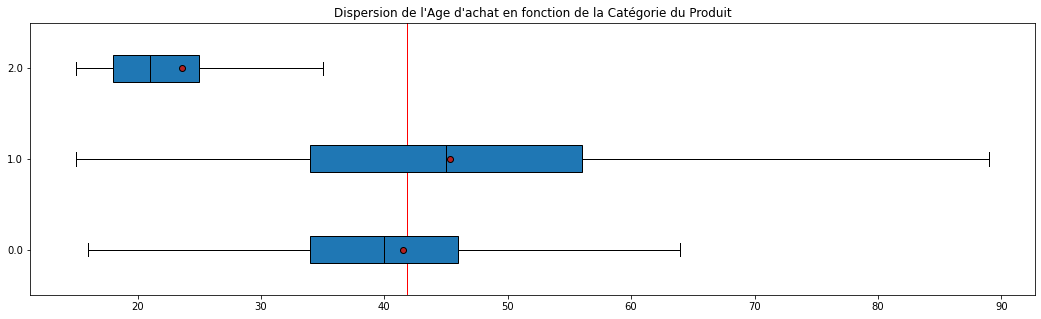

In [59]:
# Assignation des variables
DF = df
QUALI = 'categ'
QUANTI = 'age'

modalities = DF[QUALI].unique()
groups = []
for i in modalities:
    groups.append(DF[DF[QUALI]==i][QUANTI])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = DF[QUANTI].mean()
plt.axvline(x=mean, color='red', linewidth=1)

# titre
plt.title('Dispersion de l\'Age d\'achat en fonction de la Catégorie du Produit')

plt.show()

Moyenne de l'âge d'achat par produit :

In [60]:
df['age'].mean()

41.85935436180536

Moyenne de l'âge d'achat des produits achetés par catégorie :

In [61]:
mean_per_categ = pd.pivot_table(df,
                         values=['age'],
                         aggfunc='mean',
                         index='categ')
mean_per_categ

,age
categ,
0.0,41.549250
1.0,45.353332
2.0,23.634761


### Calcul du eta squared :

In [62]:
def eta_squared(x,y): # x = qualitative ; y = quantitative
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df['categ'],df['age'])

0.11902267172026916

La catégorie discrimine l'âge d'achat à hauteur de 12% avec une forte discrimination pour la catégorie 2, essentielleent achetée par des gens jeunes.

Ce nombre de 12% peut sembler faible mais s'explique certainement par les montants du chiffre d'affaires par catégorie :

   categ         age
0    0.0  17262010.0
1    1.0  10302871.0
2    2.0    862267.0


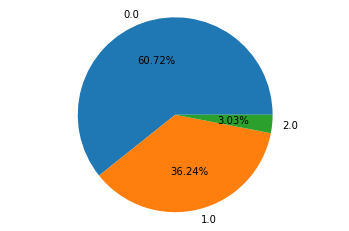

In [63]:
# Stockage du tableau sommant le CA par catégorie
temp_df = pd.pivot_table(df,
                        values=['age'],
                         aggfunc='sum',
                         index='categ')

# transformation des index en colonnes
temp_df.reset_index(inplace=True)

print(temp_df) # tableau de la répartition

# Données d'entrée
labels = temp_df['categ']
sizes = temp_df['age']

# Tracé du graphique
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%.2f%%')
ax1.axis('equal')  
plt.show()

La catégorie 2 ne représente que 3.03% du Chiffre d'affaires, expliquant donc pourquoi cette catégorie, pourtant essentiellement achetée par des jeunes, ne discrimine que faiblement l'âge d'achat toutes catégories confondues.

## Segmentation

Afin de choisir la meilleure segmentation possible pour le Khi-2, diagramme de la somme du chiffre d'affaires par âge et par catégorie :

In [64]:
# Stockage du tableau sommant le CA par âge et par catégorie
temp_df = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='sum',
                         index=['age','categ'])

# transformation des index en colonnes
temp_df.reset_index(inplace=True)

temp_df.head() # vérification

,age,categ,price
0,15.0,0.0,14729.43
1,15.0,1.0,44562.60
2,15.0,2.0,181973.80
3,16.0,0.0,22339.63
4,16.0,1.0,76778.01


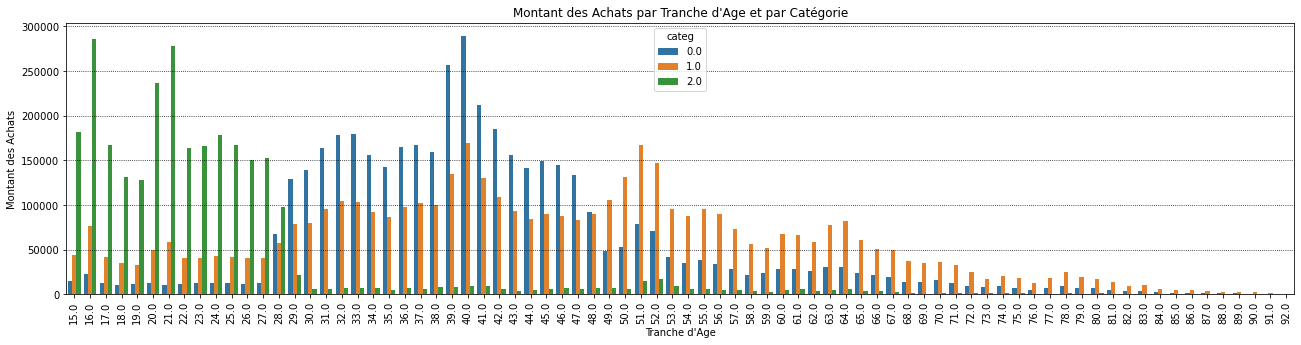

In [65]:
plt.figure(figsize=(22, 5))
plt.grid(color='black', which='major', axis='y', linestyle='dotted')
plt.xticks(rotation=90)
fig = sns.barplot(x="age", y="price", hue='categ', data=temp_df,ci=None)
fig.set(xlabel="Tranche d'Age", ylabel = "Montant des Achats", title='Montant des Achats par Tranche d\'Age et par Catégorie')

plt.show(fig)

- De 15 à 28 ans, c'est la catégorie 2 qui génère le plus de chiffre d'affaires
- De 29 à 48 ans, c'est la catégorie 0 qui génère le plus de chiffre d'affaires
- Pour les + de 48 ans, c'est la catégorie 1 qui génère le plus de chiffre d'affaires

Changement de la segmentation :

In [66]:
cut_labels = ['15-28 ans','29-48 ans','49 ans et +']
cut_bins = [0,27,48,120]
df['age_range'] = pd.cut(df['age'],
                              bins=cut_bins,
                              labels=cut_labels)

## Khi-2

H0 : pas de différence significative entre les segments d'âge pour le choix de la catégorie.

H1 : différence significative entre les segments d'âge pour le choix de la catégorie.

### Tableau de contingence :

In [67]:
X = "age_range"
Y = "categ"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
age_range,,,,
15-28 ans,15936,28498,31664,76098
29-48 ans,320947,101249,3033,425229
49 ans et +,78576,97422,1786,177784
Total,415459,227169,36483,679111


### Test

In [68]:
from scipy.stats import chi2_contingency
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2, degrees, pvalue

(288628.7211767702, 9, 0.0)

La P-Value étant égale à 0, H0 est rejeté.

La tranche d'âge influe donc sur les catégories de produits achetés.

Diagramme du Chiffre d'affaires par tranche d'âge et par catégorie :

In [69]:
# Stockage du tableau sommant le CA par segment d'âge et par catégorie
temp_df = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='sum',
                         index=['age_range','categ'])
# transformation des index en colonnes
temp_df.reset_index(inplace=True)
temp_df.head()

,age_range,categ,price
0,15-28 ans,0.0,1.697923e+05
1,15-28 ans,1.0,5.849695e+05
2,15-28 ans,2.0,2.390721e+06
3,29-48 ans,0.0,3.411266e+06
4,29-48 ans,1.0,2.071474e+06


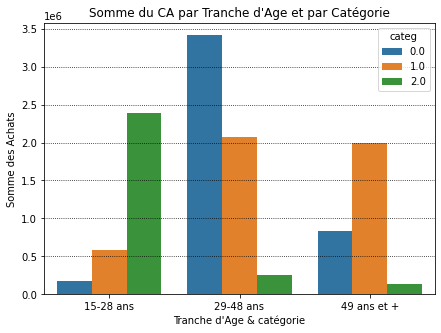

In [70]:
plt.figure(figsize=(7, 5))
plt.grid(color='black', which='major', axis='y', linestyle='dotted')
fig = sns.barplot(x="age_range", y="price", hue='categ', data=temp_df)
fig.set(xlabel="Tranche d'Age & catégorie", ylabel = "Somme des Achats", title='Somme du CA par Tranche d\'Age et par Catégorie')

plt.show(fig)

#### conclusion générale sur l'analyse bivariée âge-catégorie :
- Elle a permis de dégager 3 segments d'âge pour lesquels une des catégories est plus vendue que les autres.

# <a name="C16.2">age-sex</a>

- La variable age peut être vue soit comme une variable quantitative discrète soit comme une variable qualititative ordinale.
- La variable sex est une variable qualitative nominale.


On peut donc faire une ANOVA (quantitative-qualtitative) et un Khi-2 (2 qualitatives) après avoir trouvé la meilleure segmentation possible :

## ANOVA

### Représentation des boxplots avec la moyenne par catégorie :

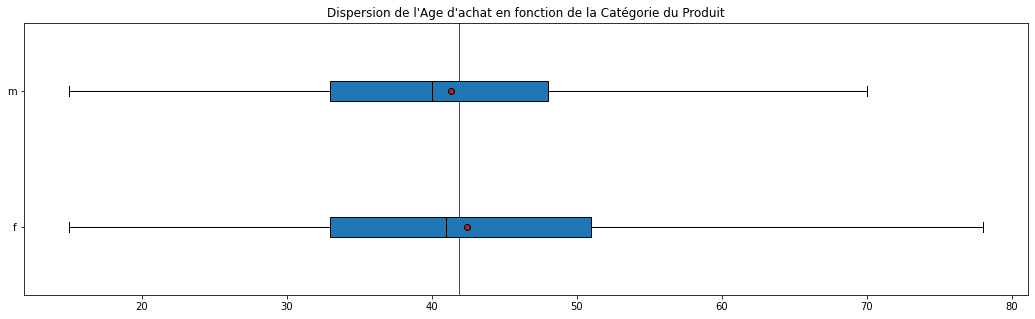

In [71]:
# Assignation des variables
DF = df
QUALI = 'sex'
QUANTI = 'age'

modalities = DF[QUALI].unique()
groups = []
for i in modalities:
    groups.append(DF[DF[QUALI]==i][QUANTI])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = DF[QUANTI].mean()
plt.axvline(x=mean, color='red', linewidth=1)

# titre
plt.title('Dispersion de l\'Age d\'achat en fonction de la Catégorie du Produit')

plt.show()

Moyenne de l'âge d'achat par produit :

In [72]:
df[QUANTI].mean()

41.85935436180536

Moyenne de l'âge d'achat en fonction du sexe :

In [73]:
mean_per_sex = pd.pivot_table(df,
                         values=QUANTI,
                         aggfunc='mean',
                         index=QUALI)
mean_per_sex

,age
sex,
f,42.420530
m,41.302362


### Calcul du eta squared :

In [74]:
def eta_squared(x,y): # x = qualitative ; y = quantitative
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(DF[QUALI],DF[QUANTI])

0.0016921676672323562

Le sexe ne discrimine pas l'âge d'achat (0.1% de discrimination).

## Khi-2

### Segmentation

Afin de choisir la meilleure segmentation possible pour le Khi-2, diagramme de la somme du chiffre d'affaires par âge et par sexe :

In [75]:
# Stockage du tableau sommant le nombre de lignes par âge et par sexe
temp_df = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='count',
                         index=['age','sex'])

# transformation des index en colonnes
temp_df.reset_index(inplace=True)

# Changement du nom de la colonne price
temp_df.rename(columns={"price": "lines_count"}, inplace=True)

temp_df.head() # vérification

,age,sex,lines_count
0,15.0,f,3100
1,15.0,m,2835
2,16.0,f,4913
3,16.0,m,4723
4,17.0,f,2529


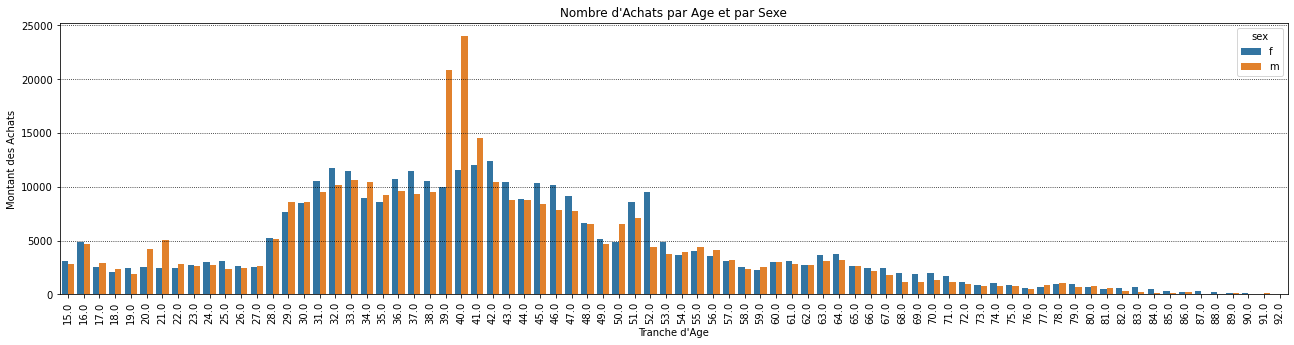

In [76]:
plt.figure(figsize=(22, 5))
plt.grid(color='black', which='major', axis='y', linestyle='dotted')
plt.xticks(rotation=90)
fig = sns.barplot(x="age", y="lines_count", hue='sex', data=temp_df,ci=None)
fig.set(xlabel="Tranche d'Age", ylabel = "Montant des Achats", title='Nombre d\'Achats par Age et par Sexe')

plt.show(fig)

Il est impossible de déterminer des tendances par tranches d'âge.

Le test du Khi-2 étant trop sensible sans segmentation, il trouvera forcément que la variable sex influe sur la variable âge mais ce résultat ne sera pas significatif.

## Conclusion analyse bivariée age-sex :
Il n'y a pas de lien entre les 2 variables car la répartition du sexe par âge, au global, est très équitablement distribuée.

Toutefois, grâce au diagramme du nombre de produits achetés par âge et par sexe, on note que :
- les hommes sont très largement majoritaires à 39 et 40 ans
- les femmes sont très largement majoritaires à 52 ans.

Il pourrait donc être intéressant de visualiser par un diagramme la somme du chiffre d'affaires par âge et par sexe pour voir si ces âges (39, 40 et 52) occasionnent une hausse sensible (ou pas) du chiffre d'affaires :

Diagramme de la somme du chiffre d'affaires par âge et par sexe

In [77]:
# Stockage du tableau sommant le chiffre d'affaires par âge et par sexe
temp_df = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='sum',
                         index=['age','sex'])

# transformation des index en colonnes
temp_df.reset_index(inplace=True)


temp_df.head() # vérification

,age,sex,price
0,15.0,f,124690.88
1,15.0,m,116574.95
2,16.0,f,192285.74
3,16.0,m,192306.69
4,17.0,f,102677.95


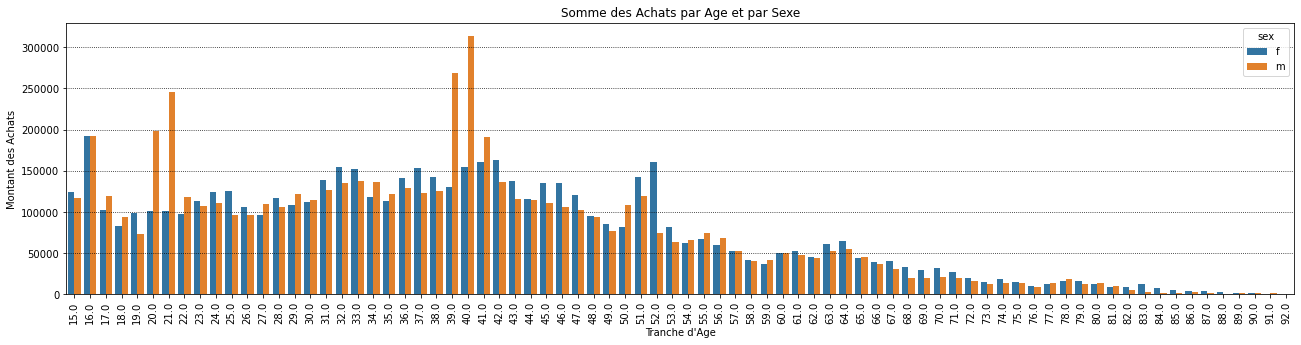

In [78]:
plt.figure(figsize=(22, 5))
plt.grid(color='black', which='major', axis='y', linestyle='dotted')
plt.xticks(rotation=90)
fig = sns.barplot(x="age", y="price", hue='sex', data=temp_df,ci=None)
fig.set(xlabel="Tranche d'Age", ylabel = "Montant des Achats", title='Somme des Achats par Age et par Sexe')

plt.show(fig)

5 années ressortent de l'analyse comparée hommes-femmes :
- 20, 21, 39 & 40 ans : Forte augmentation du CA pour les hommes
- 52 ans : augmentation marquée du CA pour les femmes.

Ces augentations de chiffre d'affaires sont-elles liées à des produits en particulier ?

In [79]:
# stockage des âges
df1 = df[df['age'] == 20]
df2 = df[df['age'] == 21]
df3 = df[df['age'] == 39]
df4 = df[df['age'] == 40]
df5 = df[df['age'] == 52]

# filtre sur le sexe
df1 = df1[df1['sex'] == 'm']
df2 = df2[df2['sex'] == 'm']
df3 = df3[df3['sex'] == 'm']
df4 = df4[df4['sex'] == 'm']
df5 = df5[df5['sex'] == 'f']

# Sortie des 10 produits les plus achetés
print('age = 20 : ','\n',df1['id_prod'].value_counts().head(10))
print('age = 21 : ','\n',df2['id_prod'].value_counts().head(10))
print('age = 39 : ','\n',df3['id_prod'].value_counts().head(10))
print('age = 40 : ','\n',df4['id_prod'].value_counts().head(10))
print('age = 52 : ','\n',df5['id_prod'].value_counts().head(10))

age = 20 :  
 2_110    63
2_112    61
2_37     55
2_135    55
2_102    54
2_39     54
2_109    52
2_202    49
2_209    48
2_43     46
Name: id_prod, dtype: int64
age = 21 :  
 2_37     86
2_39     81
2_135    72
2_102    71
2_109    70
2_110    69
2_112    69
2_104    63
2_155    57
2_208    56
Name: id_prod, dtype: int64
age = 39 :  
 0_1440    65
1_369     58
0_1450    57
0_1419    57
0_1438    56
0_1442    55
0_1443    55
0_1461    53
0_1445    53
0_1325    53
Name: id_prod, dtype: int64
age = 40 :  
 0_1438    85
0_1411    79
0_1445    72
1_369     68
0_1440    66
0_1432    66
0_1420    64
0_1428    64
0_1480    63
1_498     63
Name: id_prod, dtype: int64
age = 52 :  
 1_403    60
1_498    51
1_414    49
1_392    47
1_412    45
1_400    45
1_383    44
1_417    44
1_493    43
1_395    43
Name: id_prod, dtype: int64


# <a name="C17">categ-price</a>

- categ = variable qualitative nominale
- price = variable quantitative continue

On peut donc réaliser une ANOVA pour mesurer l'impact de la catégorie sur le prix.

## ANOVA

Représentation des boxplots avec la moyenne par catégorie :

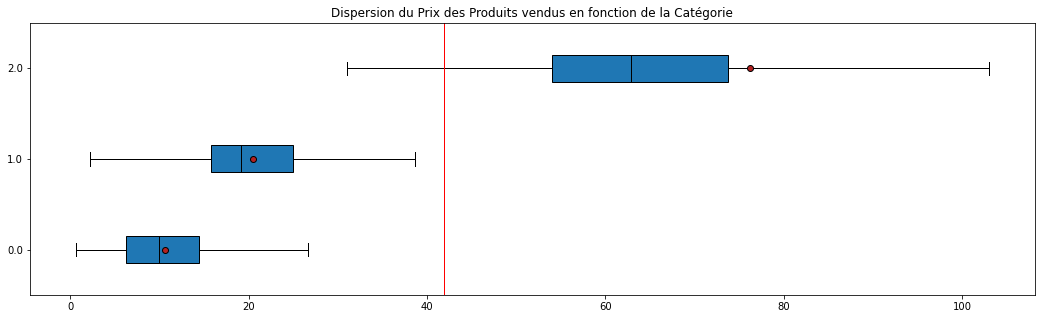

In [80]:
modalities = df['categ'].unique()
np.sort(modalities, axis=None)  
groups = []
for i in modalities:
    groups.append(df[df['categ']==i]['price'])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = DF[QUANTI].mean()
plt.axvline(x=mean, color='red', linewidth=1)

# titre
plt.title('Dispersion du Prix des Produits vendus en fonction de la Catégorie')

plt.show()

Moyenne du prix par produit :

In [81]:
df['price'].mean()

17.454773490723493

Moyenne de l'âge d'achat en fonction du sexe :

In [82]:
mean_per_categ = pd.pivot_table(df,
                         values='price',
                         aggfunc='mean',
                         index='categ')
mean_per_categ

,price
categ,
0.0,10.638188
1.0,20.485730
2.0,76.207412


Médiane du prix par produit :

In [83]:
df['price'].median()

13.99

 Médiane de l'âge d'achat en fonction du sexe :

In [84]:
median_per_categ = pd.pivot_table(df,
                         values='price',
                         aggfunc='median',
                         index='categ')
median_per_categ

,price
categ,
0.0,9.99
1.0,19.08
2.0,62.83


Calcul du eta carré :

In [85]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df['categ'],df['price'])

0.645747273862136

Les variations de prix des produits vendus sont discriminés à 64,57% par la catégorie.

## Conclusion analyse bivariée categ-prix :
- les gammes de prix sont très dépendantes de la catégorie
    - Médianes des ctaégories 0, 1 & 2 : 9.99, 19.08 & 62.83 €

# <a name="C18">sex-price</a>

- Variable sex : variable quaitative nominale
- Variable price : variable quantitative continue

On peut donc tester l'impact du sexe sur le prix :

## ANOVA

Représentation des boxplots avec la moyenne par catégorie :

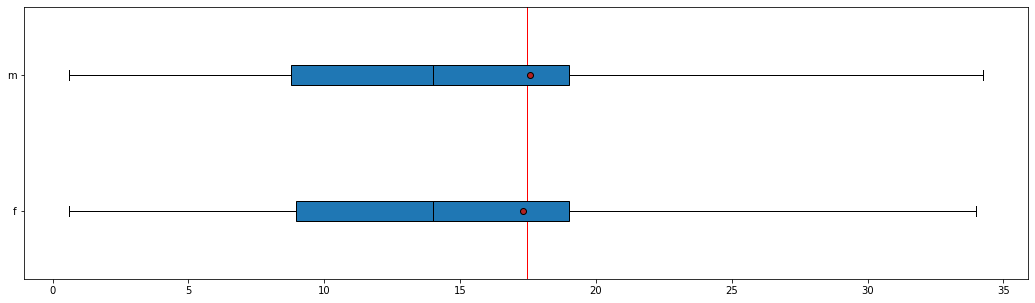

In [86]:
modalities = df['sex'].unique()
np.sort(modalities, axis=None)  
groups = []
for i in modalities:
    groups.append(df[df['sex']==i]['price'])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groups, labels=modalities, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.gcf().set_size_inches(18, 5)

# Ajout de la moyenne générale
mean = df['price'].mean()
plt.axvline(x=mean, color='red', linewidth=1)

plt.show()

Calcul du eta carré :

In [87]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df['sex'],df['price'])

5.2291096648804334e-05

Le sexe n'est pas discriminant pour le montant du prix des produits vendus.

# <a name="C21">categ-sex</a>

- categ est une variable qualitative nominale
- sex est une variable qualitative nominale

On peut donc, avec un Khi-2, tester l'imact du sexe sur la catégorie :

## Khi-2

### Tableau de contingence :

In [88]:
X = "sex"
Y = "categ"

cont = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0.0,1.0,2.0,Total
sex,,,,
f,206103,114899,17283,338285
m,209356,112270,19200,340826
Total,415459,227169,36483,679111


### Test

H0 : le sexe n'a pas d'impact sur les proportions de catégories achetées.

In [89]:
from scipy.stats import chi2_contingency
chi2, pvalue, degrees, expected = chi2_contingency(cont)
chi2, degrees, pvalue

(147.11906816131497, 6, 3.144522803251581e-29)

La P-Value étant très proche de 0, H0 est rejetée.

Le sexe influe sur les catégories achetées.

Illustration graphique avec un diagramme représentant le montant du chiffre d'affaires en fonction de la catégorie et du sexe :

In [90]:
# Stockage du tableau sommant le chiffre d'affaires par catégorie et par sexe
temp_df = pd.pivot_table(df,
                         values=['price'],
                         aggfunc='sum',
                         index=['categ','sex'])

# transformation des index en colonnes
temp_df.reset_index(inplace=True)


temp_df # vérification et visualisation

,categ,sex,price
0,0.0,f,2.190013e+06
1,0.0,m,2.229718e+06
2,1.0,f,2.358417e+06
3,1.0,m,2.295306e+06
4,2.0,f,1.311253e+06
5,2.0,m,1.469022e+06


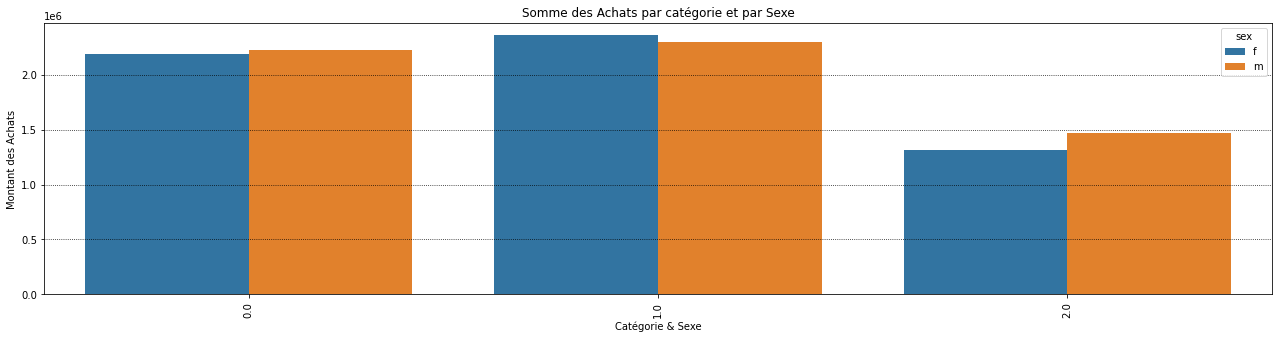

In [91]:
plt.figure(figsize=(22, 5))
plt.grid(color='black', which='major', axis='y', linestyle='dotted')
plt.xticks(rotation=90)
fig = sns.barplot(x="categ", y="price", hue='sex', data=temp_df,ci=None)
fig.set(xlabel="Catégorie & Sexe", ylabel = "Montant des Achats", title='Somme des Achats par catégorie et par Sexe')

plt.show(fig)

La différence est surtout sensible pour la catégorie 2, qui est achetée prioritairement par des hommes (environ 1 311 000 € pour les femmes et 1 469 000 € pour les hommes).

# <a name="C9">Chiffre d'affaires reconstitué (prix 0_2245 manquant)</a>

Le chiffre d'affaires a été reconstitué dans le notebook NETTOYAGE ET PREPARATION DES DONNEES.

# <a name="C91">Total du CA</a>

## Total du CA sans reconstitution

In [92]:
df['price'].sum()

11853728.680000002

## Total du CA avec reconstitution (médiane)

In [93]:
print('CA : ', df['price'].sum() + id_prod_0_2245_median['price'].sum())

print('Pourcentage de CA reconstitué sur le total : ',id_prod_0_2245_median['price'].sum()/df['price'].sum()*100)

CA :  11855962.100000001
Pourcentage de CA reconstitué sur le total :  0.01884149755990534


## Total du CA avec reconstitution (moyenne)

In [94]:
print('CA : ', df['price'].sum() + id_prod_0_2245_mean['price'].sum())

print('Pourcentage de CA reconstitué sur le total : ',id_prod_0_2245_mean['price'].sum()/df['price'].sum()*100)

CA :  11855962.100000001
Pourcentage de CA reconstitué sur le total :  0.01884149755990534


# <a name="C92">Tops et flops</a>

## Top produits

### Tableau

In [95]:
temp_df = pd.pivot_table(df,
                         values='price',
                         aggfunc='sum',
                         index=['id_prod'])

temp_df.sort_values(by='price', ascending=False).head(30)

,price
id_prod,
2_159,94893.50
2_135,69334.95
2_112,65407.76
2_102,60736.78
2_209,56971.86
1_395,54356.25
1_369,54025.48
2_110,53846.25
2_39,53060.85


### Diagramme

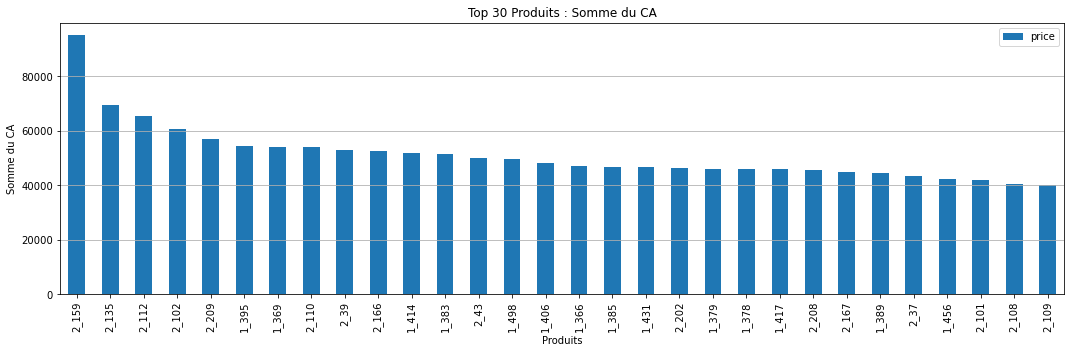

In [96]:
ax = temp_df.sort_values(by='price', ascending=False).head(30).plot(kind='bar') # Diagramme
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.title('Top 30 Produits : Somme du CA')
plt.xlabel('Produits')
plt.ylabel('Somme du CA')
plt.grid(axis = 'y')
plt.show()

## Flop produits

### Tableau

In [97]:
temp_df = pd.pivot_table(df,
                         values='price',
                         aggfunc='sum',
                         index=['id_prod'])

temp_df.sort_values(by='price', ascending=True).head(30)

,price
id_prod,
0_1539,0.99
0_1284,1.38
0_1653,1.98
0_1601,1.99
0_807,1.99
0_541,1.99
0_1728,2.27
0_1498,2.48
0_898,2.54


### Diagramme

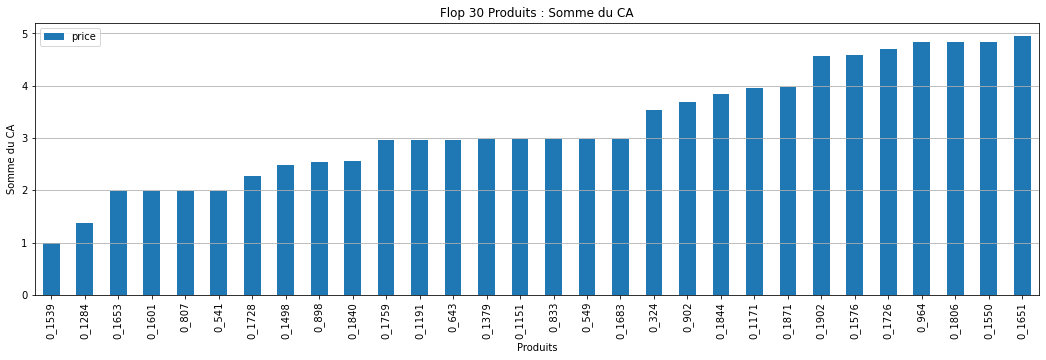

In [98]:
ax = temp_df.sort_values(by='price', ascending=True).head(30).plot(kind='bar') # Diagramme
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.title('Flop 30 Produits : Somme du CA')
plt.xlabel('Produits')
plt.ylabel('Somme du CA')
plt.grid(axis = 'y')
plt.show()

# <a name="C93">Taille du panier moyen</a>

In [99]:
# Calcul du montant des achats par session
temp_df = pd.pivot_table(df,
                        values = 'price',
                        aggfunc = 'sum',
                        index = 'session_id')
temp_df.head() # vérification

,price
session_id,
s_1,11.99
s_10,26.99
s_100,33.72
s_1000,39.22
s_10000,41.49


In [100]:
# Montant moyen du panier
temp_df['price'].mean()

34.63217786873787

# <a name="C10">Evolution du CA par mois</a>

Création d'un index avec la date.

Stockage de la somme du chiffre d'affaires par année et par mois et vérification.

In [101]:
df.set_index('date', inplace=True) # Changement de l'index pour y stocker la date
turnover_per_month = df.groupby([(df.index.year),(df.index.month)]).sum() # Somme des colonnes par année et par mois
turnover_per_month # Affichage du résulat

birth      price    categ        age
date date                                           
2019 3     56568240.0  482440.61  11806.0  1177179.0
     4     56263669.0  476109.30  10623.0  1162748.0
     5     55946722.0  492943.47  11461.0  1160693.0
     6     53109429.0  484088.56  12640.0  1100721.0
     7     48937912.0  482835.40  13151.0  1008110.0
     8     50744390.0  482284.79  11890.0  1042960.0
     9     65873169.0  507240.68  11076.0  1387797.0
     10    42741479.0  320798.74   4008.0   866902.0
     11    55982751.0  516167.73  15106.0  1177158.0
     12    64170857.0  525917.28  14051.0  1359826.0
2020 1     58020101.0  525338.99  15332.0  1252759.0
     2     58534200.0  535571.50  14167.0  1245680.0
     3     58728078.0  515456.53  13176.0  1257842.0
     4     54596000.0  492998.94  12772.0  1160040.0
     5     59285033.0  517132.60  13087.0  1264467.0
     6     56369873.0  496016.12  12676.0  1208207.0
     7     56705014.0  510783.12  12866.0  1208386.0
     8     56451254.0  506467.27  13483.0  1207626.0
     9     55986324.0  494114.53  12596.0  1191796.0
     10    57283451.0  507917.77  12874.0  1223829.0
     11    56494737.0  496664.94  12710.0  1202523.0
     12    56601986.0  510219.50  13305.0  1208394.0
2021 1     57235231.0  517540.55  13488.0  1248467.0
     2     50523407.0  456679.76  11791.0  1103038.0

Tableau du chiffre d'affaires mensuel.

Diagramme du chiffre d'affaires mensuel.

date  date
2019  3       482440.61
      4       476109.30
      5       492943.47
      6       484088.56
      7       482835.40
      8       482284.79
      9       507240.68
      10      320798.74
      11      516167.73
      12      525917.28
2020  1       525338.99
      2       535571.50
      3       515456.53
      4       492998.94
      5       517132.60
      6       496016.12
      7       510783.12
      8       506467.27
      9       494114.53
      10      507917.77
      11      496664.94
      12      510219.50
2021  1       517540.55
      2       456679.76
Name: price, dtype: float64


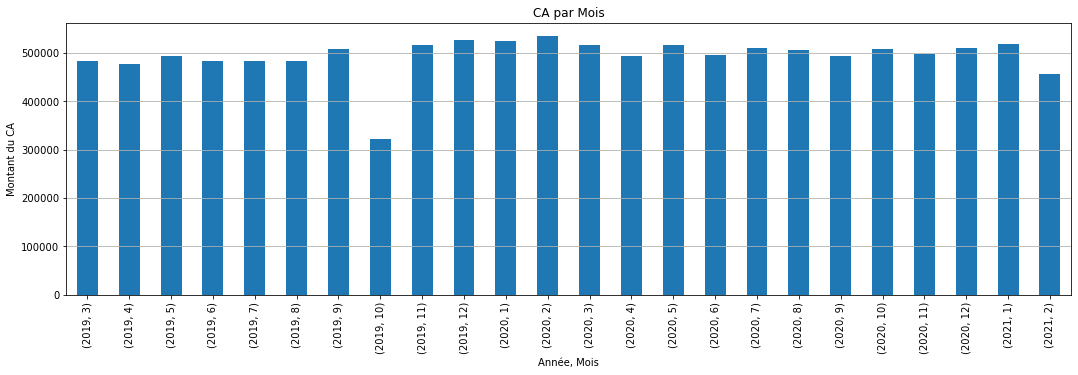

In [102]:
print(turnover_per_month['price']) # Tableau

ax = turnover_per_month['price'].plot(kind='bar') # Diagramme
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.title('CA par Mois')
plt.xlabel('Année, Mois')
plt.ylabel('Montant du CA')
plt.grid(axis = 'y')
plt.show()

WARNING : comme noté lors de l'analyse univariée de la variable date, il y a un problème de données en octobre de la première année (supposément l'année 2019).

# <a name="C11">Moyenne mobile du CA sur 10 jours</a>

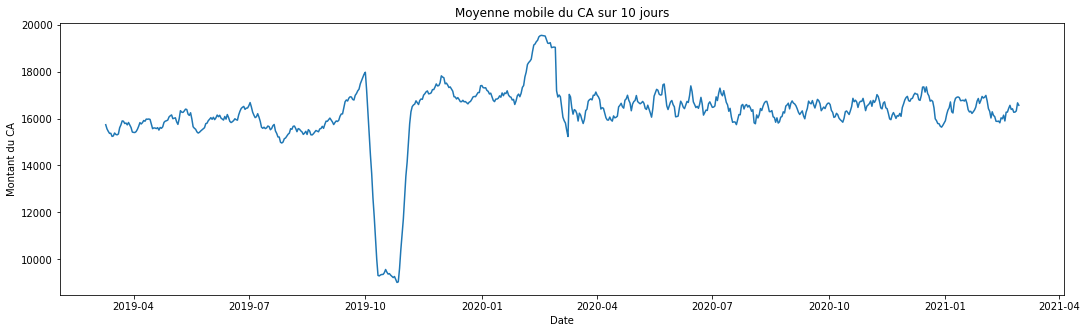

In [103]:
# Stockage du CA par jour
df_day = df.groupby(pd.Grouper(freq='D')).sum()
# Moyenne glissante sur 10 jours
df_day_mean = df_day.rolling(10).mean()
# Courbe montrant la moyenne glissante
plt.plot(df_day_mean.index, df_day_mean['price'])
plt.title("Moyenne mobile du CA sur 10 jours")
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.xlabel("Date")
plt.ylabel("Montant du CA")
plt.show()

# <a name="C12">Evolution du CA par jour</a>

Calcul et affichage du Chiffre d'affaire par jour (tableau et graphique) :

In [104]:
# Somme des colonnes par jour
turnover_per_day = df.groupby(pd.Grouper(freq='D')).sum()
# Vérification
turnover_per_day['price']

date
2019-03-01    16565.22
2019-03-02    15486.45
2019-03-03    15198.69
2019-03-04    15196.07
2019-03-05    17471.37
2019-03-06    15785.28
2019-03-07    14760.20
2019-03-08    15679.53
2019-03-09    15710.51
2019-03-10    15496.87
2019-03-11    14801.14
2019-03-12    14448.58
2019-03-13    14324.84
2019-03-14    15231.77
2019-03-15    16141.66
2019-03-16    15971.74
2019-03-17    16025.47
2019-03-18    15060.79
2019-03-19    15545.77
2019-03-20    15853.99
2019-03-21    17459.66
2019-03-22    15657.05
2019-03-23    16028.55
2019-03-24    15101.70
2019-03-25    15162.18
2019-03-26    16176.28
2019-03-27    15238.09
2019-03-28    16077.22
2019-03-29    14437.04
2019-03-30    14815.51
2019-03-31    15531.39
2019-04-01    15520.78
2019-04-02    15971.05
2019-04-03    15504.31
2019-04-04    16115.58
2019-04-05    17472.73
2019-04-06    16800.02
2019-04-07    15495.49
2019-04-08    15002.42
2019-04-09    15737.47
2019-04-10    15213.92
2019-04-11    16429.51
2019-04-12    15916.89
2019-0

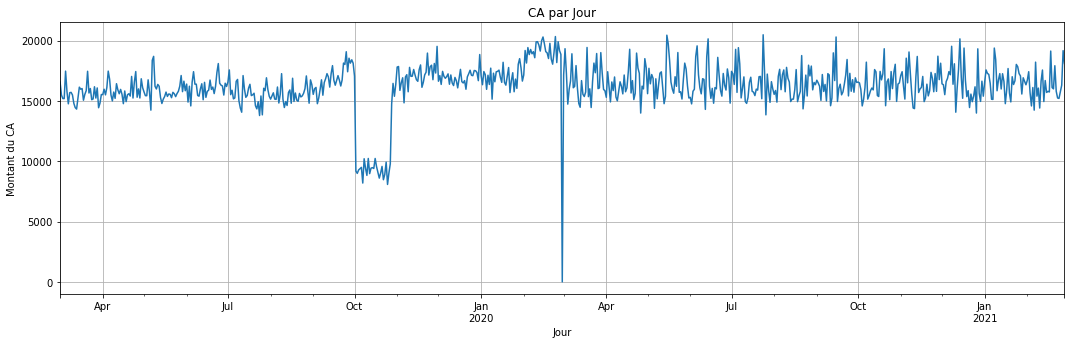

In [105]:
ax = turnover_per_day['price'].plot() # Graphique
fig = plt.gcf()
fig.set_size_inches(18, 5)
plt.title('CA par Jour')
plt.xlabel('Jour')
plt.ylabel('Montant du CA')
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.show()

Le problème de chiffre d'affaires en octobre de la 1ère année est confirmé.

Il y a également un problème sur une journée fin février de la 2ème année.

# <a name="C13">CA manquant sur octobre de la 1ère année</a>


Courbe sur le mois d'octobre :

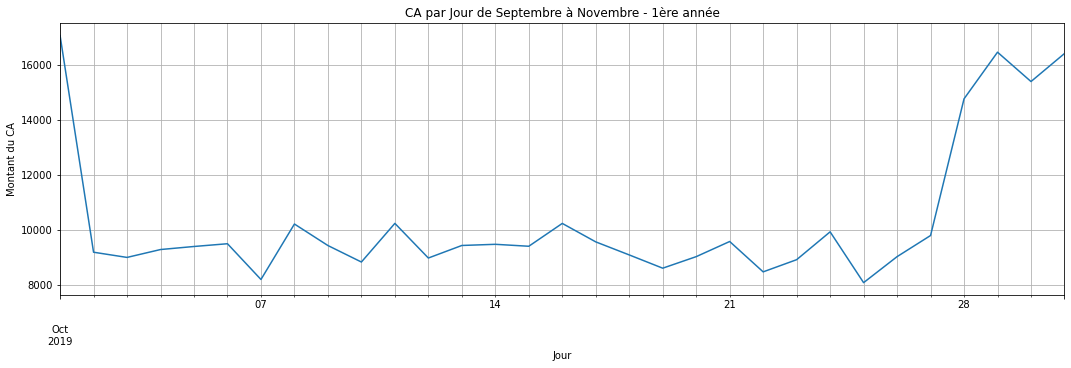

In [106]:
ax = turnover_per_day['price'].loc['2019-10-01':'2019-10-31'].plot() # Données à prendre en compte et typede graphique

plt.gcf().set_size_inches(18, 5) # Dimensions du graphique
plt.title('CA par Jour de Septembre à Novembre - 1ère année') #Titre du graphique
plt.xlabel('Jour')# Titre de l'axe des abscisses
plt.ylabel('Montant du CA') # Titre de l'axe des ordonnées
plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y
plt.grid(axis = 'x', which = 'both') # Affichage des grilles majeures et mineures de l'axe x
plt.show() # Affichage du graphique

Le problème se situe entre le 2 octobre et le 27 octobre de la 1ère année.

Recherche des valeurs uniques dans les autres colonnes sur cette période pour repérer des anomalies sur les variables qualitatives (sex, categ, birth) :

In [107]:
def unique(variable):
    return(np.sort(df.loc['2019-10-02':'2019-10-27'][variable].unique()))

print(unique('sex'))
print(unique('birth'))
print(unique('categ'))

['f' 'm']
[1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940.
 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952.
 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 1964.
 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976.
 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988.
 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000.
 2001. 2002. 2003. 2004.]
[0. 2.]


- Sex : les deux sexes sont présents
- Birth : années de naissance de 1929 à 2004
- (WARNING) Categ : manque la catégorie 1, qui contribue pour 1/3 au CA global (calcul sur les 2 ans)

Etude du CA sur la catégorie 1 :

In [108]:
# Stockage du CA par mois pour la catégorie 1
df_categ_1 = df[df['categ'] == 1]
df_categ_1.head()

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_range
date,,,,,,,,,
2020-04-23 21:29:11.595386,1_379,s_198433,c_103,f,1986.0,26.99,1.0,34.0,29-48 ans
2019-11-23 21:29:11.595386,1_379,s_124067,c_103,f,1986.0,26.99,1.0,33.0,29-48 ans
2020-05-21 11:22:47.053593,1_379,s_211850,c_8534,m,1988.0,26.99,1.0,32.0,29-48 ans
2021-01-21 11:22:47.053593,1_379,s_330121,c_8534,m,1988.0,26.99,1.0,33.0,29-48 ans
2020-07-21 11:22:47.053593,1_379,s_241563,c_8534,m,1988.0,26.99,1.0,32.0,29-48 ans


In [109]:
turnover_per_day_categ_1 = df_categ_1.groupby(pd.Grouper(freq='D')).sum()
turnover_per_day_categ_1['price'].head()

date
2019-03-01    6811.53
2019-03-02    5627.15
2019-03-03    5691.41
2019-03-04    6098.98
2019-03-05    7071.21
Freq: D, Name: price, dtype: float64

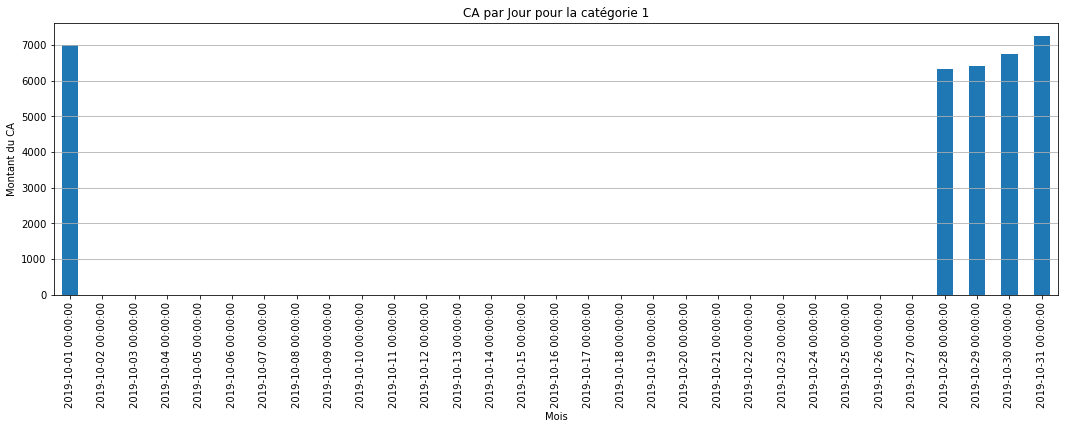

In [110]:
# Diagramme du CA par jour pour la catégorie 1 en octobre de la 1ère année
ax = turnover_per_day_categ_1['price'].loc['2019-10-01':'2019-10-31'].plot(kind='bar') # Données à prendre en compte et typede graphique

plt.gcf().set_size_inches(18, 5) # Dimensions du graphique
plt.title('CA par Jour pour la catégorie 1') #Titre du graphique
plt.xlabel('Mois')# Titre de l'axe des abscisses
plt.ylabel('Montant du CA') # Titre de l'axe des ordonnées
plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y
plt.show() # Affichage du graphique

Calcul de la moyenne du CA de la catégorie 1 par jour sur la première année afin d'approximer le CA manquant du 2 au 27 octobre :

In [111]:
# somme du CA de la catégorie 1 en année 1
df_categ1 = df[df['categ'] == 1]
sum_turnover_year1_categ1 = df_categ1['price'].loc['2019-03-31':'2019-12-31'].sum()
print('Somme CA catégorie 1 année 1 : ',sum_turnover_year1_categ1) # Vérification

# calcul de la moyenne : / par 339 car manque 26 jours de CA -du 2 octobre au 27 octobre-
mean_turnover_year1_categ1_per_day = sum_turnover_year1_categ1/339
print('moyenne CA par jour catégorie 1 année 1: ',mean_turnover_year1_categ1_per_day)

# calcul de l'approximation de CA manquant sur octobre
missing_turnover = mean_turnover_year1_categ1_per_day*26
print('Approximation CA manquant sur octobre année 1: ',missing_turnover)

# Comparaison moyenne du CA par mois en année 1 (octobre exclu) & CA reconstitué pour octobre
print('Moyenne du CA par mois hors mois d\'octobre : ',(df['price'].loc['2019-03-01':'2019-09-30'].sum()+df['price'].loc['2019-11-01':'2019-12-31'].sum())/9)
print('CA approximé pour mois d\'octobre : ',df['price'].loc['2019-10-01':'2019-10-31'].sum()+missing_turnover)

Somme CA catégorie 1 année 1 :  1597242.56
moyenne CA par jour catégorie 1 année 1:  4711.629970501475
Approximation CA manquant sur octobre année 1:  122502.37923303836
Moyenne du CA par mois hors mois d'octobre :  494447.5355555556
CA approximé pour mois d'octobre :  443301.11923303833


#### CA avec approximation est un peu faible par rapport à la moyenne du CA sur les autres mois mais le raisonnement semble quand même cohérent.

# <a name="C14">CA manquant fin février de la 2ème année</a>

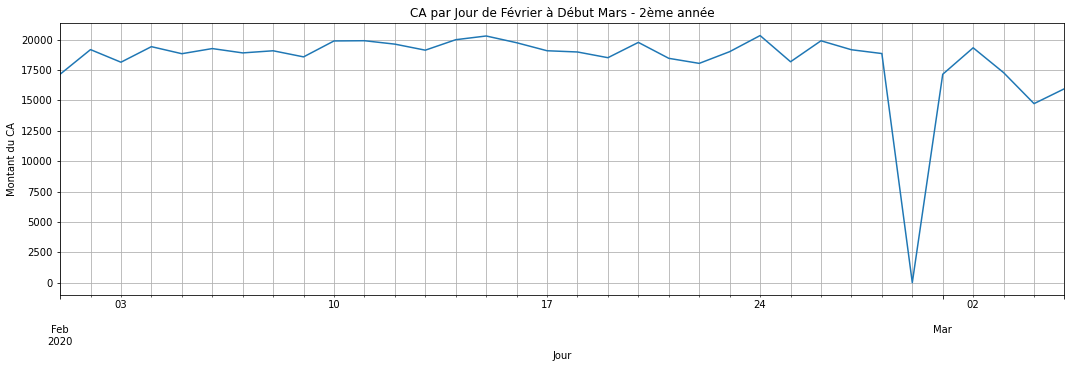

In [112]:
ax = turnover_per_day['price'].loc['2020-02-01':'2020-03-05'].plot() # Données à prendre en compte et typede graphique

plt.gcf().set_size_inches(18, 5) # Dimensions du graphique
plt.title('CA par Jour de Février à Début Mars - 2ème année') #Titre du graphique
plt.xlabel('Jour')# Titre de l'axe des abscisses
plt.ylabel('Montant du CA') # Titre de l'axe des ordonnées
plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y
plt.grid(axis = 'x', which = 'both') # Affichage des grilles majeures et mineures de l'axe x
plt.show() # Affichage du graphique

2020 étant une année bissextile comme 2016 et 2024, le regroupement du CA par jour, turnover_per_day, obtenu avec (df.groupby(pd.Grouper(freq='D')).sum()) a créé la ligne du 29 février.

Mais les dates des données d'origine sont sur 2021, 2022 et 2023 qui ne sont pas des années bissextiles.

Donc, si les vraies dates des données contiennent le 29 février 2020, il est forcément manquant car le compteur des dates est faux.

# <a name="C14.5">Saisonnalité du CA</a>

In [113]:
# Stockage du CA par mois en année 1
turnover_2019 = turnover_per_month[turnover_per_month.index.get_level_values(0) == 2019]
turnover_2019 = turnover_2019.droplevel(0)
turnover_2019

,birth,price,categ,age
date,,,,
3,56568240.0,482440.61,11806.0,1177179.0
4,56263669.0,476109.30,10623.0,1162748.0
5,55946722.0,492943.47,11461.0,1160693.0
6,53109429.0,484088.56,12640.0,1100721.0
7,48937912.0,482835.40,13151.0,1008110.0
8,50744390.0,482284.79,11890.0,1042960.0
9,65873169.0,507240.68,11076.0,1387797.0
10,42741479.0,320798.74,4008.0,866902.0
11,55982751.0,516167.73,15106.0,1177158.0


In [114]:
# Stockage du CA par mois en année 2
turnover_2020 = turnover_per_month[turnover_per_month.index.get_level_values(0) == 2020]
turnover_2020 = turnover_2020.droplevel(0)
turnover_2020

,birth,price,categ,age
date,,,,
1,58020101.0,525338.99,15332.0,1252759.0
2,58534200.0,535571.50,14167.0,1245680.0
3,58728078.0,515456.53,13176.0,1257842.0
4,54596000.0,492998.94,12772.0,1160040.0
5,59285033.0,517132.60,13087.0,1264467.0
6,56369873.0,496016.12,12676.0,1208207.0
7,56705014.0,510783.12,12866.0,1208386.0
8,56451254.0,506467.27,13483.0,1207626.0
9,55986324.0,494114.53,12596.0,1191796.0


In [115]:
# Stockage du CA par mois en année 3
turnover_2021 = turnover_per_month[turnover_per_month.index.get_level_values(0) == 2021]
turnover_2021 = turnover_2021.droplevel(0)
turnover_2021

,birth,price,categ,age
date,,,,
1,57235231.0,517540.55,13488.0,1248467.0
2,50523407.0,456679.76,11791.0,1103038.0


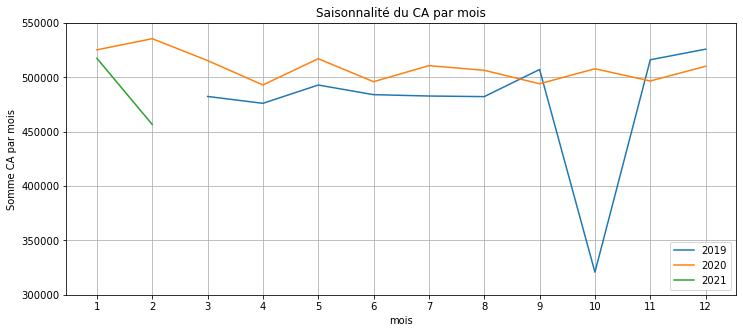

In [116]:
# Tracé des 3 années
plt.plot(turnover_2019['price'])
plt.plot(turnover_2020['price'])
plt.plot(turnover_2021['price'])

plt.xticks(np.arange(1,13)) # définition des marques sur l'axe des abscisses

# Ajustement de a taille du graphique
fig = plt.gcf()
fig.set_size_inches(12, 5)

plt.grid(axis = 'y') # Affichage de la grille principale de l'axe y

plt.grid(axis = 'x') # Affichage de la grille principale de l'axe x

plt.ylim(300000, 550000) # Ajustement des limites de l'axe des ordonnéesb

plt.title('Saisonnalité du CA par mois') # titre du graphique
plt.xlabel('mois')# Titre de l'axe des abscisses
plt.ylabel('Somme CA par mois') # Titre de l'axe des ordonnées

plt.legend(['2019', '2020','2021'], loc='lower right')

plt.show()

On ne repère pas de saisonnalités car les variations ne snt pas assez importantes.

De toute façon, les analyses ne peuvent pas être très éclairantes car on ne dispose que d'une seule année complète.

WARNING : par contre, il y a une baisse assez marquée du chiffre d'affaires en Février de l'année 3 qui ne correspond pas du tout à la légère augmentation de janvier à février de l'année 2.

# <a name="C14.6">CA : Répartition par catégorie</a>

In [117]:
temp_df = pd.pivot_table(df,
                         values='price',
                         aggfunc='sum',
                         index='categ')

temp_df.sort_values(by='price', ascending=False)

,price
categ,
1.0,4.653723e+06
0.0,4.419731e+06
2.0,2.780275e+06


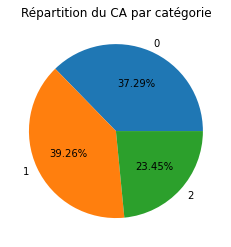

In [118]:
# piechart
plt.pie(temp_df['price'], labels = ['0','1','2'],autopct='%.2f%%')
plt.title('Répartition du CA par catégorie')
plt.show()

# <a name="C14.7">Courbe de Lorenz</a>

In [119]:
# sommes par client

In [120]:
client_sum = df.groupby(df['client_id']).sum()
client_sum.head()

,birth,price,categ,age
client_id,,,,
c_1,76245.0,558.18,10.0,2518.0
c_10,113448.0,1353.60,42.0,3689.0
c_100,15936.0,254.85,7.0,218.0
c_1000,245750.0,2261.89,82.0,6715.0
c_1001,202164.0,1812.86,33.0,3837.0


In [121]:
# transformation de l'index en colonne

In [122]:
client_sum.reset_index(inplace=True)
client_sum.head()

,client_id,birth,price,categ,age
0,c_1,76245.0,558.18,10.0,2518.0
1,c_10,113448.0,1353.60,42.0,3689.0
2,c_100,15936.0,254.85,7.0,218.0
3,c_1000,245750.0,2261.89,82.0,6715.0
4,c_1001,202164.0,1812.86,33.0,3837.0


In [123]:
# visualisation de la courbe de Lorenz

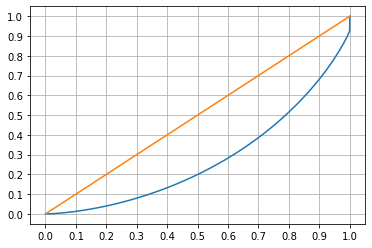

In [124]:
dep = client_sum['price']

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bissectrice
plt.grid(True)

plt.xticks(np.arange(0, 1.1, step=0.1))  # Set label locations.
plt.yticks(np.arange(0,1.1, step=0.1))

plt.show()

quand x = 0.5, y = 0.2 :
50% des clients fournissent 80% du CA, l'autre moitié fournit 20%

quand x = 0.8, y = environ 50% :
20% des clients fournit la moitié (environ) du CA, les 80% restants fournit l'autre moitié 

In [125]:
# indice de Gini

In [126]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.44638654137401146

la répartition du CA est disparate

# <a name="C14.8">Fréquence d'achat (nombre de produits achetés)</a>

## Fréquence d'achat sur 2 ans

In [127]:
client_id_count.head()

,client_id
c_3263,403
c_2140,402
c_2595,398
c_2077,384
c_1637,380


### Moyenne de la fréquance d'achat sur 2 ans

In [128]:
client_id_count['client_id'].mean()

73.57805956258726

### Médiane de la fréquance d'achat sur 2 ans

In [129]:
client_id_count['client_id'].median()

51.0

## Fréquence d'achat par mois

Création des colonnes year et month dans le df de base :

In [130]:
df['year'] = df.index.year
df['month'] = df.index.month
df.head()

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_range,year,month
date,,,,,,,,,,,
2020-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986.0,4.18,0.0,34.0,29-48 ans,2020,5
2019-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986.0,4.18,0.0,33.0,29-48 ans,2019,7
2020-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986.0,4.18,0.0,34.0,29-48 ans,2020,8
2019-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968.0,4.18,0.0,51.0,49 ans et +,2019,5
2020-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968.0,4.18,0.0,52.0,49 ans et +,2020,5


Création de la colonne 'count'

In [131]:
df['count'] = 1
df.head()

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_range,year,month,count
date,,,,,,,,,,,,
2020-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986.0,4.18,0.0,34.0,29-48 ans,2020,5,1
2019-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986.0,4.18,0.0,33.0,29-48 ans,2019,7,1
2020-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986.0,4.18,0.0,34.0,29-48 ans,2020,8,1
2019-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968.0,4.18,0.0,51.0,49 ans et +,2019,5,1
2020-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968.0,4.18,0.0,52.0,49 ans et +,2020,5,1


### stockage dans tableau temporaire du nombre d'achats par client et par an :

In [132]:
temp_df = pd.pivot_table(df,
                         values=['count'],
                         aggfunc='sum',
                         index=['client_id','year','month'])
temp_df.head()

count
client_id year month       
c_1       2019 6          1
               7          4
               8          1
               9          2
               10         1

In [133]:
# Transformation des index en colonnes
temp_df.reset_index(inplace=True)
temp_df.head(40)

,client_id,year,month,count
0,c_1,2019,6,1
1,c_1,2019,7,4
2,c_1,2019,8,1
3,c_1,2019,9,2
4,c_1,2019,10,1
5,c_1,2019,11,7
6,c_1,2019,12,3
7,c_1,2020,2,1
8,c_1,2020,3,2
9,c_1,2020,4,2


### Statistiques descriptives de la variable fréquence d'achat par mois

In [134]:
temp_df['count'].describe()

count    137129.000000
mean          4.952351
std          16.179994
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max        1430.000000
Name: count, dtype: float64

Moyenne de la fréquence d'achat par mois : 4.95

Médiane de la fréquence d'achat par mois : 3

# Moyenne et médiane des fréquences d'achat par mois

In [135]:
print(temp_df['count'].mean())
print(temp_df['count'].median())

4.952351435509629
3.0
